# Import statements

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import plotly.express as px
import numpy as np
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import joblib
from imblearn.over_sampling import SMOTE
# from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.linear_model import LassoCV
import statsmodels.api as sm
from scipy.stats import chi2_contingency


# BigQuery (Dont run multiple times)

In [21]:
from google.cloud import bigquery

# # Construct a BigQuery client object.
# client = bigquery.Client()

# query = """
#     SELECT SQLDATE, EventCode, QuadClass, GoldsteinScale, AvgTone, NumArticles, ActionGeo_CountryCode, IsRootEvent
#     FROM `gb-lab-data-share-1.gdelt2023.gkg`
#     WHERE SQLDATE > 20150101
#     AND ActionGeo_CountryCode IN ('SP', 'AG', 'LE', 'YM', 'FR')
# """
# query_job = client.query(query)  # Make an API request.

# # Retrieve the results
# results = query_job.to_dataframe()

# # print("The query data:")
# # for row in query_job:
# #     # Row values can be accessed by field name or index.
# #     print("name={}, count={}".format(row[0], row["total_people"]))
# results.head()

In [43]:
# Construct a BigQuery client object.
client = bigquery.Client()

query = """
    SELECT DATE, DocumentIdentifier, Counts, Themes, Locations, organizations, V2Tone, GCAM, Amounts
    FROM `gb-lab-data-share-1.gdelt2023.gkg`
    WHERE DATE > 20210301000000 AND DATE < 20210601000000
    AND SPLIT(Locations, '#')[OFFSET(2)] IN ('HK', 'FR')
    LIMIT 1000000
"""

query_job = client.query(query)  # Make an API request.

# Retrieve the results
results = query_job.to_dataframe()

# print("The query data:")
# for row in query_job:
#     # Row values can be accessed by field name or index.
#     print("name={}, count={}".format(row[0], row["total_people"]))
results.head()



,DATE,DocumentIdentifier,Counts,Themes,Locations,organizations,V2Tone,GCAM,Amounts
0,20210419140000,https://zib.com.ua/ua/147422-poshirennya_u_soc...,None,SECURITY_SERVICES;TAX_FNCACT;TAX_FNCACT_POLICE...,1#France#FR#FR#46#2#FR,None,"-8.7719298245614,1.75438596491228,10.526315789...","wc:108,nwc:135,c12.1:15,c12.10:20,c12.12:11,c1...",None
1,20210309144500,http://joursdefrance.lefigaro.fr/article/combi...,None,TAX_FNCACT;TAX_FNCACT_PRINCE;TAX_FNCACT_DUCHES...,1#France#FR#FR#46#2#FR,netflix,"2.42290748898678,2.6431718061674,0.22026431718...","wc:396,c1.2:1,c12.1:17,c12.10:25,c12.12:5,c12....","17000000,viewers,269;1000000,of dollars on the..."
2,20210408094500,https://www.nbcchicago.com/news/sports/french-...,None,None,"1#France#FR#FR#46#2#FR;3#Chicago, Illinois, Un...",None,"-0.810810810810811,2.97297297297297,3.78378378...","wc:328,c1.3:1,c12.1:25,c12.10:36,c12.12:8,c12....","5,Chicago app,420;2,weeks now separating the,1..."
3,20210325121500,https://www.90min.com/posts/barcelona-keen-to-...,None,None,"1#France#FR#FR#46#2#FR;4#Barcelona, Comunidad ...",None,"-1.63487738419619,1.63487738419619,3.269754768...","wc:341,c1.2:3,c12.1:16,c12.10:27,c12.12:7,c12....","29,goals,787;88,appearances hasn,796;"
4,20210327010000,https://www.em.com.br/app/noticia/gerais/2021/...,KILL#2000#Brazilian#1#Brazil#BR#BR#-10#-55#BR;,GEN_HOLIDAY;ENV_MINING;GENERAL_HEALTH;HEALTH_P...,"1#France#FR#FR#46#2#FR;4#Sao Firmino, Amazonas...",commission of health,"-3.58851674641148,3.22966507177034,6.818181818...","wc:741,nwc:1072,c12.1:56,c12.10:75,c12.12:36,c...","3,of June,686;"


In [44]:
results.to_csv('events_FR_HK_GKG_2021_2021.csv', index=False)

In [35]:
from google.cloud import bigquery

# Construct a BigQuery client object.
client = bigquery.Client()

query = """
    SELECT SQLDATE, CAST(EventCode AS STRING) AS EventCode, QuadClass, GoldsteinScale, AvgTone, NumArticles, ActionGeo_CountryCode, IsRootEvent, NumMentions
    FROM `gb-lab-data-share-1.gdelt2023.events`
    WHERE SQLDATE > 20150101
    AND ActionGeo_CountryCode IN ('HK')
    AND IsRootEvent = 1
"""
query_job = client.query(query)  # Make an API request.

# Retrieve the results
results = query_job.to_dataframe()

results.head()


,SQLDATE,EventCode,QuadClass,GoldsteinScale,AvgTone,NumArticles,ActionGeo_CountryCode,IsRootEvent,NumMentions
0,20230411,044,1,2.5,3.738318,4,HK,1,4
1,20230411,031,1,5.2,2.232046,16,HK,1,16
2,20230411,1711,4,-9.2,-11.904762,10,HK,1,10
3,20230411,044,1,2.5,2.839117,10,HK,1,10
4,20230411,072,2,8.3,-1.706037,8,HK,1,8


In [36]:
results.to_csv('events_HK_string.csv', index=False)

# Import CSV (Can run multiple times instead of BigQuery tab)

## Events df

In [45]:
df_gkg = pd.read_csv('events_FR_HK_GKG_2021_2021.csv', encoding='utf8')

In [46]:
df_gkg.head()

,DATE,DocumentIdentifier,Counts,Themes,Locations,organizations,V2Tone,GCAM,Amounts
0,20210419140000,https://zib.com.ua/ua/147422-poshirennya_u_soc...,NaN,SECURITY_SERVICES;TAX_FNCACT;TAX_FNCACT_POLICE...,1#France#FR#FR#46#2#FR,NaN,"-8.7719298245614,1.75438596491228,10.526315789...","wc:108,nwc:135,c12.1:15,c12.10:20,c12.12:11,c1...",NaN
1,20210309144500,http://joursdefrance.lefigaro.fr/article/combi...,NaN,TAX_FNCACT;TAX_FNCACT_PRINCE;TAX_FNCACT_DUCHES...,1#France#FR#FR#46#2#FR,netflix,"2.42290748898678,2.6431718061674,0.22026431718...","wc:396,c1.2:1,c12.1:17,c12.10:25,c12.12:5,c12....","17000000,viewers,269;1000000,of dollars on the..."
2,20210408094500,https://www.nbcchicago.com/news/sports/french-...,NaN,NaN,"1#France#FR#FR#46#2#FR;3#Chicago, Illinois, Un...",NaN,"-0.810810810810811,2.97297297297297,3.78378378...","wc:328,c1.3:1,c12.1:25,c12.10:36,c12.12:8,c12....","5,Chicago app,420;2,weeks now separating the,1..."
3,20210325121500,https://www.90min.com/posts/barcelona-keen-to-...,NaN,NaN,"1#France#FR#FR#46#2#FR;4#Barcelona, Comunidad ...",NaN,"-1.63487738419619,1.63487738419619,3.269754768...","wc:341,c1.2:3,c12.1:16,c12.10:27,c12.12:7,c12....","29,goals,787;88,appearances hasn,796;"
4,20210327010000,https://www.em.com.br/app/noticia/gerais/2021/...,KILL#2000#Brazilian#1#Brazil#BR#BR#-10#-55#BR;,GEN_HOLIDAY;ENV_MINING;GENERAL_HEALTH;HEALTH_P...,"1#France#FR#FR#46#2#FR;4#Sao Firmino, Amazonas...",commission of health,"-3.58851674641148,3.22966507177034,6.818181818...","wc:741,nwc:1072,c12.1:56,c12.10:75,c12.12:36,c...","3,of June,686;"


In [94]:
# Convert the 'date' column to datetime format
# df['DATE'] = pd.to_datetime(df['DATE'])
df_gkg_process = df_gkg.copy()
# Convert the 'date' column to string and then to datetime format
df_gkg_process['DATE'] = pd.to_datetime(df_gkg_process['DATE'].astype(str), format='%Y%m%d%H%M%S')

# Filter the dataframe based on the desired date range
filtered_df = df_gkg_process.query("'2021-04-25' <= DATE <= '2021-05-15'")
filtered_df_2 = filtered_df[filtered_df['Counts'].str.split("#").str[0] == "PROTEST"]
filtered_df_3 = filtered_df_2[filtered_df_2['Counts'].str.split("#").str[5] == "HK"]



In [95]:
# filtered_df_2.head()

In [108]:


filtered_df_3 = filtered_df_3.sort_values(by="DATE", ascending=True)

print(filtered_df_3['DocumentIdentifier'].head(20))

# filtered_df_3.head(40)

308152                http://www.inmediahk.net/node/1082281
259930                http://www.inmediahk.net/node/1082280
437017    https://www.wenweipo.com/a/202104/28/AP6089290...
327238               http://blog.udn.com/yiping86/131473277
21831     http://www.elexpresso.com/440_mundo/7526955_co...
179065    https://www.laliberte.ch/news-agence/detail/ve...
233575    https://www.rfj.ch/rfj/Actualite/Monde/Veillee...
290343    https://www.msn.com/en-xl/news/other/anger-as-...
187497    https://www.rtn.ch/rtn/Actualite/Monde/Veillee...
287887    https://www.sott.net/article/452155-Anger-as-H...
285952    https://www.thestandard.com.hk/breaking-news/s...
42929                   https://www.ryt9.com/s/iq29/3219656
77863     https://www.wenweipo.com/a/202105/03/AP608fd9d...
56410     https://hd.stheadline.com/news/realtime/hk/206...
191428    https://hk.on.cc/hk/bkn/cnt/news/20210505/bkn-...
343587    https://www.epochtimes.com/gb/21/5/5/n12925684...
324079    http://paper.wenweipo.com/2021

In [54]:
df_events = pd.read_csv('events_HK_string.csv', encoding='utf8', dtype={'EventCode': str})

df_events.head()

,SQLDATE,EventCode,QuadClass,GoldsteinScale,AvgTone,NumArticles,ActionGeo_CountryCode,IsRootEvent,NumMentions
0,20230411,044,1,2.5,3.738318,4,HK,1,4
1,20230411,031,1,5.2,2.232046,16,HK,1,16
2,20230411,1711,4,-9.2,-11.904762,10,HK,1,10
3,20230411,044,1,2.5,2.839117,10,HK,1,10
4,20230411,072,2,8.3,-1.706037,8,HK,1,8


In [7]:
# Filter the DataFrame for the specified date range
start_date = 20150218
end_date = 20200101
df_filtered = df_events.copy()
df_filtered_date_range = df_filtered[(df_filtered['SQLDATE'] >= start_date) & (df_filtered['SQLDATE'] <= end_date)]

In [10]:
df_filtered_date_range['SQLDATE'].min()
df_events = df_filtered_date_range.copy()

In [11]:
# df_events[df_events['EventCode']=='185'].value_counts()

In [12]:
# df_events = pd.read_csv('events_ALL.csv', encoding='utf8')
# df_events.head()

In [13]:
# df_events = pd.read_csv('events_newest.csv', encoding='utf8')
# df_events.head()

In [14]:
# df_events = pd.read_csv('events_FR_SP_AG_L_YM.csv', encoding='utf8')
# df_events = pd.read_csv('events_FR_SP_AG_L_YM.csv', encoding='utf8', dtype={'EventCode': str})
# df_events.head()

In [55]:
df_events['EventCode'].value_counts()

042     51372
043     44145
010     41426
020     35306
051     27934
        ...  
1431        1
0814        1
0254        1
201         1
0255        1
Name: EventCode, Length: 228, dtype: int64

In [56]:
nan_count = df_events.isna().sum()
print(nan_count)

SQLDATE                   0
EventCode                 0
QuadClass                 0
GoldsteinScale           11
AvgTone                   0
NumArticles               0
ActionGeo_CountryCode     0
IsRootEvent               0
NumMentions               0
dtype: int64


In [57]:
non_int_count = pd.to_numeric(df_events['EventCode'], errors='coerce').isna().sum()
print(non_int_count)

0


In [58]:
non_int_count = pd.to_numeric(df_events['GoldsteinScale'], errors='coerce').isna().sum()
print(non_int_count)

11


In [59]:
# Replace invalid values with NaN
df_events['EventCode'] = df_events['EventCode'].replace('---', np.nan)

# Convert the column to integer
df_events['EventCode'] = df_events['EventCode'].astype(str)
nan_count = df_events.isna().sum()
print(nan_count)

SQLDATE                   0
EventCode                 0
QuadClass                 0
GoldsteinScale           11
AvgTone                   0
NumArticles               0
ActionGeo_CountryCode     0
IsRootEvent               0
NumMentions               0
dtype: int64


In [60]:
df_events = df_events.dropna()


In [61]:
nan_count = df_events.isna().sum()
print(nan_count)

SQLDATE                  0
EventCode                0
QuadClass                0
GoldsteinScale           0
AvgTone                  0
NumArticles              0
ActionGeo_CountryCode    0
IsRootEvent              0
NumMentions              0
dtype: int64


In [62]:
df_events['ActionGeo_CountryCode'].value_counts().head(10)

HK    566771
Name: ActionGeo_CountryCode, dtype: int64

In [63]:
df_events['EventCode'].value_counts()

042     51372
043     44145
010     41426
020     35306
051     27934
        ...  
1622        1
0254        1
0255        1
1431        1
1232        1
Name: EventCode, Length: 227, dtype: int64

In [64]:
# df_section = df_events[df_events['EventCode']=='141']
# df_section['EventCode'].value_counts()

In [65]:
# df_events = df_events[df_events['ActionGeo_CountryCode'] == 'HK']

In [66]:
# df_events['EventCode'].value_counts()

Below is the cell where you define the target variable i.e protest have an event code starting with 14

In [67]:
df_events.head()

,SQLDATE,EventCode,QuadClass,GoldsteinScale,AvgTone,NumArticles,ActionGeo_CountryCode,IsRootEvent,NumMentions
0,20230411,044,1,2.5,3.738318,4,HK,1,4
1,20230411,031,1,5.2,2.232046,16,HK,1,16
2,20230411,1711,4,-9.2,-11.904762,10,HK,1,10
3,20230411,044,1,2.5,2.839117,10,HK,1,10
4,20230411,072,2,8.3,-1.706037,8,HK,1,8


In [68]:
# df_events['Contains14'] = df_events['EventCode'].astype(str).str.startswith('14').astype(int)
df_events_contains14_temp = df_events.copy()
# df_events_contains14['Contains14'] = df_events_contains14['EventCode'].astype(str).str.startswith('14').astype(int)


# prefixes = ('20', '18', '19', '17', '13')

prefixes = ('141')
df_events_contains14_temp['Contains14'] = df_events_contains14_temp['EventCode'].astype(str).str.startswith(prefixes).astype(int)

IQR is important to distinguish between important and non important protest events based on the NumArticles features. We look at the median and say events above 4 are serious and below is not.

In [69]:
# Calculate statistics
q1 = np.percentile(df_events_contains14_temp['NumArticles'], 25)
q2 = np.percentile(df_events_contains14_temp['NumArticles'], 50)
q3 = np.percentile(df_events_contains14_temp['NumArticles'], 75)
mean = np.mean(df_events_contains14_temp['NumArticles'])
median = np.median(df_events_contains14_temp['NumArticles'])

# Print the statistics
print("Q1: ", q1)
print("Q2 (Median): ", q2)
print("Q3: ", q3)
print("Mean: ", mean)
print("Median: ", median)


Q1:  2.0
Q2 (Median):  5.0
Q3:  10.0
Mean:  6.15273187936574
Median:  5.0


In [70]:
df_events_contains14_temp.head()

,SQLDATE,EventCode,QuadClass,GoldsteinScale,AvgTone,NumArticles,ActionGeo_CountryCode,IsRootEvent,NumMentions,Contains14
0,20230411,044,1,2.5,3.738318,4,HK,1,4,0
1,20230411,031,1,5.2,2.232046,16,HK,1,16,0
2,20230411,1711,4,-9.2,-11.904762,10,HK,1,10,0
3,20230411,044,1,2.5,2.839117,10,HK,1,10,0
4,20230411,072,2,8.3,-1.706037,8,HK,1,8,0


In [71]:
# df_num_articles = df_events_contains14_temp.copy()
# value = 4
# # Filter rows based on the condition
# df_events_contains14_filtered = df_num_articles[df_num_articles['NumMentions'] >=value]

# # # Create a new column based on 'NumArticles' values
# # df_num_articles['AboveBelow4'] = (df_num_articles['NumMentions'] > Value).astype(int)

# # # Set values below or equal to 4 as 0
# # df_num_articles.loc[df_num_articles['NumMentions'] <= Value, 'AboveBelow4'] = 0



# # df_num_articles.rename(columns={'Contains14': 'Contains14sub', 'AboveBelow4': 'Contains14'}, inplace=True)
# # # Verify the updated DataFrame
# # df_events_contains14_filtered = df_num_articles.copy()

In [72]:
df_num_articles = df_events_contains14_temp.copy()
Value = 10
# Filter rows based on the condition
df_events_contains14_filtered = df_num_articles[df_num_articles['Contains14'] != 0]

# Create a new column based on 'NumArticles' values
df_events_contains14_filtered['AboveBelow4'] = (df_events_contains14_filtered['NumArticles'] > Value).astype(int)

# Set values below or equal to 4 as 0
df_events_contains14_filtered.loc[df_events_contains14_filtered['NumArticles'] <= Value, 'AboveBelow4'] = 0



df_events_contains14_filtered.rename(columns={'Contains14': 'Contains14sub', 'AboveBelow4': 'Contains14'}, inplace=True)
# Verify the updated DataFrame
df_events_contains14_filtered.head()


/var/tmp/ipykernel_7114/751933849.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_events_contains14_filtered['AboveBelow4'] = (df_events_contains14_filtered['NumArticles'] > Value).astype(int)
/var/tmp/ipykernel_7114/751933849.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_events_contains14_filtered.rename(columns={'Contains14': 'Contains14sub', 'AboveBelow4': 'Contains14'}, inplace=True)


,SQLDATE,EventCode,QuadClass,GoldsteinScale,AvgTone,NumArticles,ActionGeo_CountryCode,IsRootEvent,NumMentions,Contains14sub,Contains14
576,20170427,1412,3,-6.5,-5.015679,12,HK,1,12,1,1
1850,20171001,1411,3,-6.5,-1.256732,10,HK,1,10,1,0
2029,20161114,1411,3,-6.5,-0.131062,1,HK,1,1,1,0
4947,20170427,1412,3,-6.5,-10.185185,10,HK,1,10,1,0
5839,20171204,1413,3,-6.5,-5.508475,10,HK,1,10,1,0


In [73]:
df_events_contains14_temp['Contains14'].value_counts()

0    552183
1     14588
Name: Contains14, dtype: int64

In [74]:
df_events_contains14_filtered['Contains14'].value_counts()

0    14023
1      565
Name: Contains14, dtype: int64

In [75]:
df_events_contains14 = df_events_contains14_filtered.copy()

In [124]:
# df_events_contains14.to_csv('events_IS_141.csv', index=False)

## GKG 

## ACLED (Not needed)

In [ ]:
df_ACLED = pd.read_csv('2014-01-01-2023-06-26-Europe-France.csv', encoding='utf8')
df_ACLED.head()


In [ ]:
print(df_ACLED['year'].max())
print(df_ACLED['year'].min())

# ACLED (Not needed)

In [ ]:
# df_ACLED = pd.read_csv('2022-06-01-2023-06-01-Europe-France.csv', encoding='utf8')
# df_ACLED.head()

In [ ]:
df_ACLED.info()

In [ ]:
df_ACLED['year'].min()

In [ ]:
def plot_against_time(dataframe, dependant_variable, title):

    # Convert "event_date" column to datetime format
    df_ACLED['event_date'] = pd.to_datetime(df_ACLED['event_date'], format='%d %B %Y')

    # Group events by date and sub_event_type, and count occurrences
    grouped = df_ACLED.groupby(['event_date', dependant_variable]).size().reset_index(name='occurrences')

    # Pivot the table to create the desired format
    pivoted_table = grouped.pivot_table(index='event_date', columns=dependant_variable, values='occurrences', fill_value=0)

    # Create a table with unique dates
    dates_table = pd.DataFrame({'event_date': df_ACLED['event_date'].unique()})

    # Merge the tables to get the final result
    result_table = pd.merge(dates_table, pivoted_table, on='event_date', how='left')

    # Set up the style using Seaborn
    sns.set(style="darkgrid", palette="bright")

    # Plot each column with a different color against time
    plt.figure(figsize=(10, 6))
    for column in pivoted_table.columns:
        sns.lineplot(data=pivoted_table[column], label=column)

    plt.xlabel('Event Date')
    plt.ylabel('Number of Occurrences')
    plt.title(title)
    plt.xticks(rotation=45)
    plt.legend(loc='upper left')
    plt.tight_layout()
    plt.show()
    return result_table

results_sub_event_type = plot_against_time(df_ACLED, 'sub_event_type', 'Occurrences of Sub-event Types Over Time')


In [ ]:
print(results_sub_event_type)

In [ ]:

results_event_type = plot_against_time(df_ACLED, 'event_type', 'Occurrences of event Types Over Time')

violent demonstartions and riots are very similiar variables. May be redundant to use both sub event type and event type. just use sub event type feature.

In [ ]:

# def correlation_plot(results_df, group_1, group_2, group_1_name, group_2_name):
#     # Extract the columns for peaceful protests and violent protests
#     peaceful_protests = results_df[group_1]
#     violent_protests = results_df[group_2]

#     # Calculate the correlation coefficient
#     correlation = peaceful_protests.corr(violent_protests)

#     # Create a scatter plot
#     plt.scatter(peaceful_protests, violent_protests)
#     plt.xlabel(group_1_name)
#     plt.ylabel(group_2_name)
#     plt.title('Correlation between '+group_1_name +' and '+ group_2_name)
#     plt.text(0.1, 0.9, f'Correlation: {correlation:.2f}', transform=plt.gca().transAxes)
#     plt.show()
#     return None

    
    
# correlation_plot(results_sub_event_type, 'Peaceful protest', 'Violent demonstration', 'Peaceful protest', 'Violent demonstration')

whenever violent demonstrations is high the numebr of peacful protests is high. But a high number of peacful protests doesnt always imply violent demonstartions. Implies there are other factors for violent protests. there is some other factor which causes an increase in peacful and violent protests possibly?

In [ ]:
is_not_zero = lambda x: x!=0 
df_NaN = df_ACLED.isna().sum().where(is_not_zero).dropna()
# df.isna().sum()

In [ ]:
df_dropped_NaN = df_ACLED.dropna()

In [ ]:
df_ACLED.shape

In [ ]:
df_ACLED['timestamp'].apply(lambda x: datetime.fromtimestamp(x)).dt.month.value_counts()

In [ ]:
pd.to_datetime(df_ACLED['timestamp'], infer_datetime_format=True)

In [ ]:
def graph_plotter(data_frame, column_name, title_name):
    data_frame[column_name].value_counts().plot.bar(color='red', title=title_name)
    plt.xticks(rotation=45)
    return plt.show()

graph_plotter(df_ACLED, "source_scale", 'ACLED France Source Scale')
graph_plotter(df_ACLED,"event_type", 'ACLED France event type')
graph_plotter(df_ACLED, "sub_event_type", 'ACLED France Sub event type')
graph_plotter(df_ACLED, "disorder_type", 'ACLED France disorder type')



In [ ]:
fig = px.scatter_mapbox(df_ACLED,
# Here, plotly gets, (x,y) coordinates
lat="latitude",
lon="longitude",
# text='fatalities',

                #Here, plotly detects color of series
                size="time_precision",
                color = "sub_event_type",
                # labels="fatalities",

                zoom=8,
                center={"lat":48.856614, "lon":2.3522219},
                height=600,
                width=800)
fig.update_layout(mapbox_style='stamen-terrain')
fig.update_layout(margin={"r": 0, "t": 0, "l": 0, "b": 0})
# fig.update_layout(title_text="ACLED fatalities in France")
fig.show()

In [ ]:
corr = df_ACLED.corr(numeric_only=True)
corr.style.background_gradient(cmap='coolwarm')

seems to be some week correlation between inter2 and interaction 

In [ ]:
graph_plotter(df_ACLED,"interaction", 'ACLED France interaction')
graph_plotter(df_ACLED,"inter1", 'ACLED France interaction type 1')
graph_plotter(df_ACLED,"inter2", 'ACLED France interaction type 2')
graph_plotter(df_ACLED,"fatalities", 'fatalities')

In [ ]:
df_ACLED['fatalities'].info()

There are no fatalaities

In [ ]:
def get_conflict_group(r):
    r.tolist()
    r = sorted(r)
    return ''.join(r)

conflict_data = df_ACLED.query('event_type== "Protests"')[['actor1']].apply(get_conflict_group,axis=1).value_counts()[:10].to_frame(name="Number of Conflicts").reset_index().rename(columns={"index": "Conflict Groups"})

with pd.option_context('display.max_colwidth', None):
      display(conflict_data.style.set_properties(**{
                'font-size': '10pt',
                'background_gradient': True
        }).background_gradient(axis=0,gmap=conflict_data['Number of Conflicts'],
            cmap='YlOrRd'
        )  )


In [ ]:
print(conflict_data)

Plotted for the dataset where the NaN are removed

In [ ]:
graph_plotter(df_dropped_NaN, "sub_event_type", 'ACLED France Sub event type')

# GKG data

In [ ]:
df_gkg = pd.read_csv('gkg.csv', encoding='utf8')
df_gkg.info()


In [ ]:
df_gkg['Locations'].value_counts()

In [ ]:
df_gkg.head()

Themes  contains key topic - topic modelling has almost been done for me

In [ ]:
# key people
df_gkg['Persons'][4]

In [ ]:
df_gkg['Organizations'][4]

In [ ]:
df_gkg['Themes'] 
# Topic modelling??


## V2 Tone 6 dimensions corresponding to the following 
[Tone, possitive score, negative score, polarity, activity reference density, self/group refrecne denisty, word count]
## Tone 
Avergae tone of the document (-10 negative to 10 possitive) - positive score - negative score columns
## Polarity 
Percenatge - high polarity suggets words used were highly emotional - can have neutral tone but high polarity
## Group reference
Percentage that measures how many times groups or individuals are refercned - a measure of reliability of news articles

In [ ]:
df_gkg['V2Tone'][4]

In [ ]:
df_gkg['Dates'][4]

## GCAM column

In [ ]:
# df_gkg['GCAM'][0]

Count-based scores: In count-based dimensions, the score represents the number of words or terms in the document that were found in a particular content analysis dictionary or dimension. For example, a score of 10 in a count-based dimension would indicate that 10 words in the document were matched to that specific dictionary or dimension.

Numeric value scores: Some content analysis systems assign numeric scores to words or terms based on certain attributes, such as sentiment or emotion. In these cases, the score represents an aggregated measure of the assigned scores for the matched words or terms in the document. For example, a score of 3.5 could represent the average sentiment score of the words in the document that matched a sentiment analysis dictionary.

In [ ]:
import pandas as pd

def parse_gcam_column(gcam_string):
    gcam_entries = gcam_string.split(',')
    gcam_data = []
    word_count = 0

    for entry in gcam_entries:
        key, value = entry.split(':')

        if key == 'wc':
            word_count = int(value)
        else:
            if '.' in key:
                dictionary_id, dimension_id = key.split('.')
            else:
                dictionary_id = key
                dimension_id = ''

            score = float(value)

            gcam_data.append({
                'DictionaryID': dictionary_id,
                'DimensionID': dimension_id,
                'Score': score
            })

    return pd.DataFrame(gcam_data), word_count


gcam_string = df_gkg['GCAM'][0]
gcam_data, word_count = parse_gcam_column(gcam_string)

print("Word Count:", word_count)

# Print the extracted dimension information
print(gcam_data)


In [ ]:
# do spertaely for c and v indexes and then have two columns in teh initial df of these 
# Would prob make more sense to pick one dict
# aggregated_value = gcam_data['Score'].sum()
aggregated_value = gcam_data['Score'].max()  # or min()



In [ ]:
print(aggregated_value)

In [ ]:

# Read the codebook from the text file
codebook_df = pd.read_csv('GCAM-MASTER-CODEBOOK.TXT', delimiter='\t', encoding='latin-1')

# Extract the relevant information from the codebook
dictionary_ids = codebook_df['DictionaryID'].unique()
dimension_ids = codebook_df['DimensionID'].unique()

# Print the dictionary and dimension IDs along with their human-readable names
# for dictionary_id in dictionary_ids:
#     dictionary_name = codebook_df.loc[codebook_df['DictionaryID'] == dictionary_id, 'DictionaryHumanName'].iloc[0]
#     print(f"Dictionary ID: {dictionary_id} - Dictionary Name: {dictionary_name}")
#     dimensions = codebook_df.loc[codebook_df['DictionaryID'] == dictionary_id, ['DimensionID', 'DimensionHumanName']]
#     for _, dimension in dimensions.iterrows():
#         print(f"    Dimension ID: {dimension['DimensionID']} - Dimension Name: {dimension['DimensionHumanName']}")


In [ ]:


# Read the codebook from the text file
codebook_df = pd.read_csv('GCAM-MASTER-CODEBOOK.TXT', delimiter='\t', encoding='latin-1')

# Extract the relevant information from the codebook
dictionary_ids = codebook_df['DictionaryID'].unique()
dimension_ids = codebook_df['DimensionID'].unique()

# Create an empty DataFrame to store the dictionary and dimension information
dictionary_dim_df = pd.DataFrame(columns=['DictionaryID', 'DictionaryName', 'DimensionID', 'DimensionName'])

# Iterate over the dictionary and dimension IDs and extract their names
for dictionary_id in dictionary_ids:
    dictionary_name = codebook_df.loc[codebook_df['DictionaryID'] == dictionary_id, 'DictionaryHumanName'].iloc[0]
    dimensions = codebook_df.loc[codebook_df['DictionaryID'] == dictionary_id, ['DimensionID', 'DimensionHumanName']]
    for _, dimension in dimensions.iterrows():
        dimension_id = dimension['DimensionID']
        dimension_name = dimension['DimensionHumanName']
        row = {'DictionaryID': dictionary_id,
               'DictionaryName': dictionary_name,
               'DimensionID': dimension_id,
               'DimensionName': dimension_name}
        dictionary_dim_df = pd.concat([dictionary_dim_df, pd.DataFrame([row])], ignore_index=True)





In [ ]:
dictionary_dim_df.head()

In [ ]:
dictionary_dim_df.iloc[300]

In [ ]:
dictionary_dim_df.head()

Amounts (any numbers mentioned in the document) may be useful + quotatiions (what nlp should i do on this?)

# Events data

In [22]:
df_events = df_events_contains14.copy()

In [23]:
df_events.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14588 entries, 384 to 499165
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   SQLDATE                14588 non-null  int64  
 1   EventCode              14588 non-null  object 
 2   QuadClass              14588 non-null  int64  
 3   GoldsteinScale         14588 non-null  float64
 4   AvgTone                14588 non-null  float64
 5   NumArticles            14588 non-null  int64  
 6   ActionGeo_CountryCode  14588 non-null  object 
 7   IsRootEvent            14588 non-null  int64  
 8   NumMentions            14588 non-null  int64  
 9   Contains14sub          14588 non-null  int64  
 10  Contains14             14588 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 1.3+ MB


In [24]:
df_events['IsRootEvent'].value_counts()

1    14588
Name: IsRootEvent, dtype: int64

any event code with 14 in its first 2 digits is a protest event 

<AxesSubplot: >

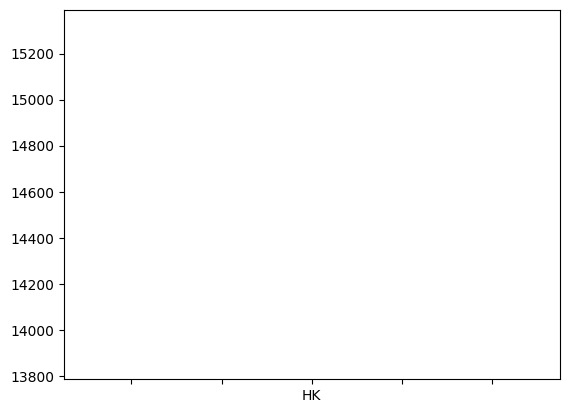

In [25]:
df_events['ActionGeo_CountryCode'].value_counts().plot()

In [145]:
# Remove rows where 'isrootevent' column contains 0
df_events = df_events[df_events['IsRootEvent'] != 0]
df_events['IsRootEvent'].value_counts()

1    566771
Name: IsRootEvent, dtype: int64

In [27]:
df_events_contains14['Contains14'].value_counts()

0    13803
1      785
Name: Contains14, dtype: int64

In [28]:
# df_events_protests['SQLDATE'].value_counts().sort_index().plot()

In [29]:
# Actor1Geo_CountryCode  

In [30]:
# Filtered by ActionGeo_CountryCode = FR
df_events_contains14['ActionGeo_CountryCode'].value_counts()

HK    14588
Name: ActionGeo_CountryCode, dtype: int64

Quad class: 1=Verbal Cooperation, 2=Material Cooperation, 3=Verbal Conflict, 4=Material Conflict

In [31]:
df_events_contains14['QuadClass'].value_counts()

3    14588
Name: QuadClass, dtype: int64

In [32]:
# df_events['SOURCEURL'][10]

In [33]:
# YYYY MM DD HH MM SS
# Probably only want sensitivity up to a day no more - use SQLDATE
# df_events['DATEADDED'][2500]
# df_events['FractionDate'].value_counts().sort_index().plot()

<AxesSubplot: >

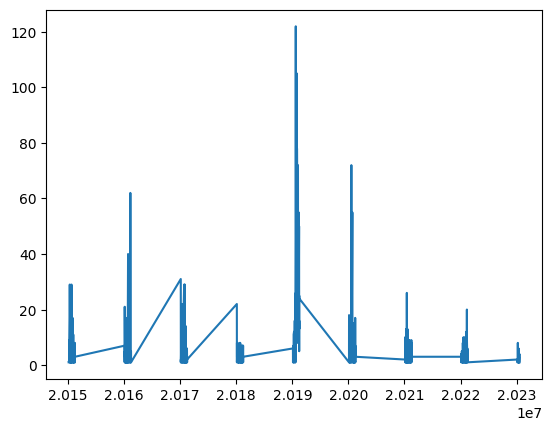

In [34]:
df_events_contains14['SQLDATE'].value_counts().sort_index().plot()

<AxesSubplot: >

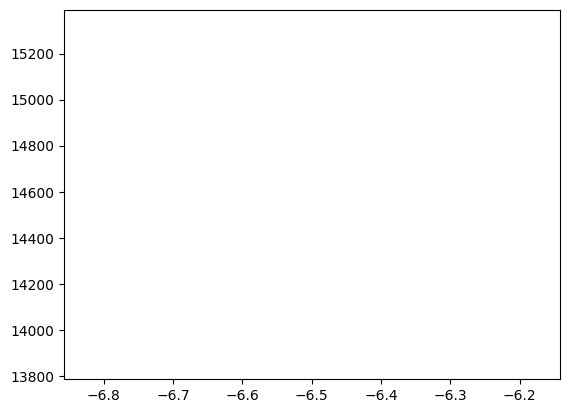

In [35]:
df_events_contains14['GoldsteinScale'].value_counts().sort_index().plot()

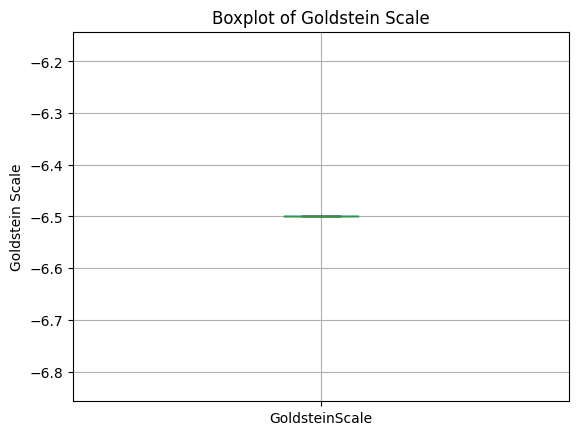

In [36]:
df_events_contains14.boxplot(column='GoldsteinScale')

plt.ylabel('Goldstein Scale')
plt.title('Boxplot of Goldstein Scale')
plt.show()

In [37]:
# YYYY MM DD HH MM SS
# Probably only want sensitivity up to a day no more - use SQLDATE
# df_events['DATEADDED'][2500]
df_events_contains14['SQLDATE'].min()

20150102

In [38]:
def plot_counts(df, column_name, n):
    value_counts = df[column_name].value_counts().head(n)

    # Create a bar plot
    plt.figure(figsize=(10, 6))
    value_counts.plot(kind='bar')
    plt.xlabel(column_name)
    plt.ylabel('Occurrences')
    plt.title('Top ' + str(n) +  ' Number of Occurrences of ' + column_name)
    return plt.show()

# plot_counts(df_events, 'Actor1Code', 10)
# plot_counts(df_events, 'Actor1KnownGroupCode', 10)

In [39]:
# maybe filter by this root event to stop reoccurences
# plot_counts(df_events,'Actor2Code',10)

In [40]:
# event code = 186?? assination attempt!?
# maybe pick the more serious events and keep these rather than going through each ID 
# df_events.iloc[9999]['Actor2Code']


In [41]:
# df_events['SQLDATE']

In [42]:

df_events_plotty = df_events_contains14.head(1000).copy()

In [43]:
df_events_plotty.head()

,SQLDATE,EventCode,QuadClass,GoldsteinScale,AvgTone,NumArticles,ActionGeo_CountryCode,IsRootEvent,NumMentions,Contains14sub,Contains14
384,20170427,1412,3,-6.5,-5.015679,12,HK,1,12,1,1
1728,20171001,1411,3,-6.5,-1.256732,10,HK,1,10,1,0
2459,20170427,1412,3,-6.5,-10.185185,10,HK,1,10,1,0
3125,20161114,1411,3,-6.5,-0.131062,1,HK,1,1,1,0
3181,20171203,1413,3,-6.5,-5.087719,10,HK,1,10,1,0


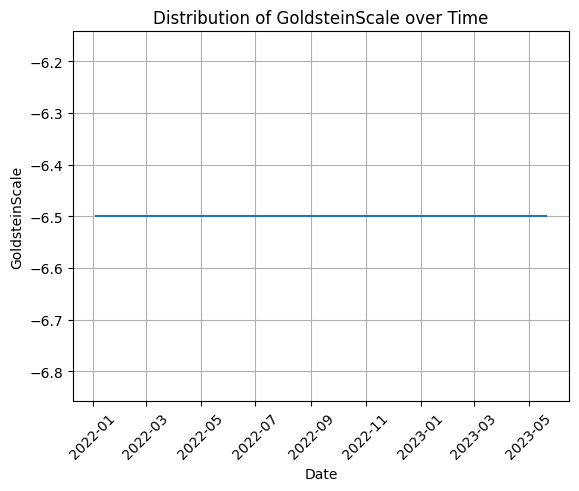

In [44]:

# def plot_against_time(column_name, year, df):
#     df.loc[:, 'SQLDATE'] = pd.to_datetime(df['SQLDATE'], format='%Y%m%d')
#     df.sort_values('SQLDATE', inplace=True)

#     # df['SQLDATE'] = pd.to_datetime(df['SQLDATE'], format='%Y%m%d')
#     # df.sort_values('SQLDATE', inplace=True)

#     # Filter the data for dates starting from 2023
#     df_filtered = df[df['SQLDATE'].dt.year >= year]

#     plt.plot(df_filtered['SQLDATE'], df_filtered[column_name])
#     plt.xlabel('Date')
#     plt.ylabel(column_name)
#     plt.title('Distribution of {} over Time'.format(column_name))
#     plt.grid(True)
#     plt.xticks(rotation=45)

#     return plt.show()

def plot_against_time(column_name, year, df):
    df_copy = df.copy()  # Make a copy of the DataFrame to avoid modifying the original
    df_copy['SQLDATE'] = pd.to_datetime(df_copy['SQLDATE'], format='%Y%m%d')
    df_copy.sort_values('SQLDATE', inplace=True)

    # Filter the data for dates starting from the specified year
    df_filtered = df_copy[df_copy['SQLDATE'].dt.year >= year]

    plt.plot(df_filtered['SQLDATE'], df_filtered[column_name])
    plt.xlabel('Date')
    plt.ylabel(column_name)
    plt.title('Distribution of {} over Time'.format(column_name))
    plt.grid(True)
    plt.xticks(rotation=45)

    return plt.show()


plot_against_time('GoldsteinScale', 2022, df_events_contains14)


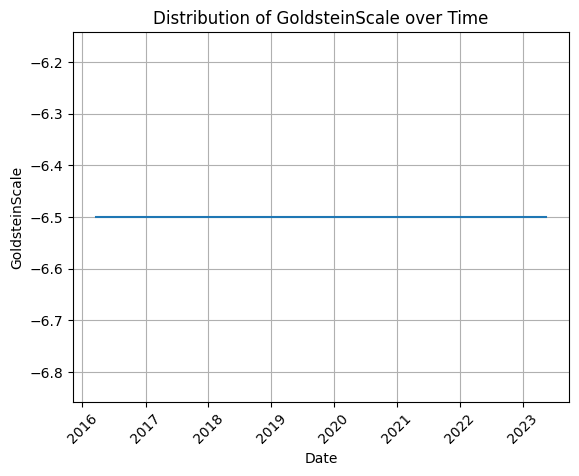

In [45]:
plot_against_time('GoldsteinScale', 2014, df_events_plotty)


Had to reduce the number of rows to 1000 in order to see a sensitivity as when all the data is used there are roughly 10,000,000 points 

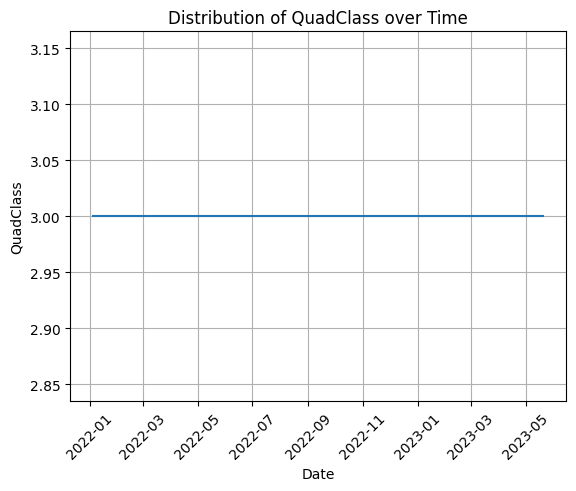

In [46]:
plot_against_time('QuadClass', 2022, df_events)

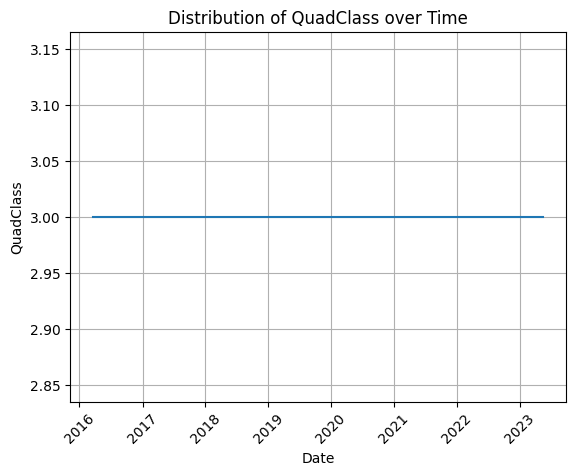

In [47]:
plot_against_time('QuadClass', 2014, df_events_plotty)

In [48]:
df_events_contains14['QuadClass'].value_counts()

3    14588
Name: QuadClass, dtype: int64

In [49]:
df_events_contains14['EventCode'].value_counts()

141     14390
1411      108
1412       85
1413        5
Name: EventCode, dtype: int64

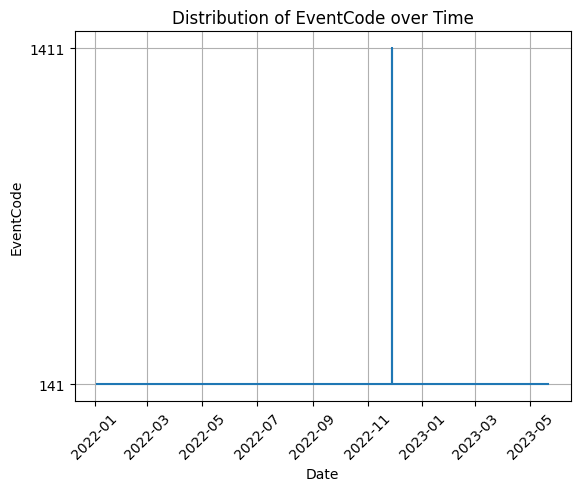

In [50]:
plot_against_time('EventCode', 2022, df_events_contains14)

/var/tmp/ipykernel_6519/1770004960.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


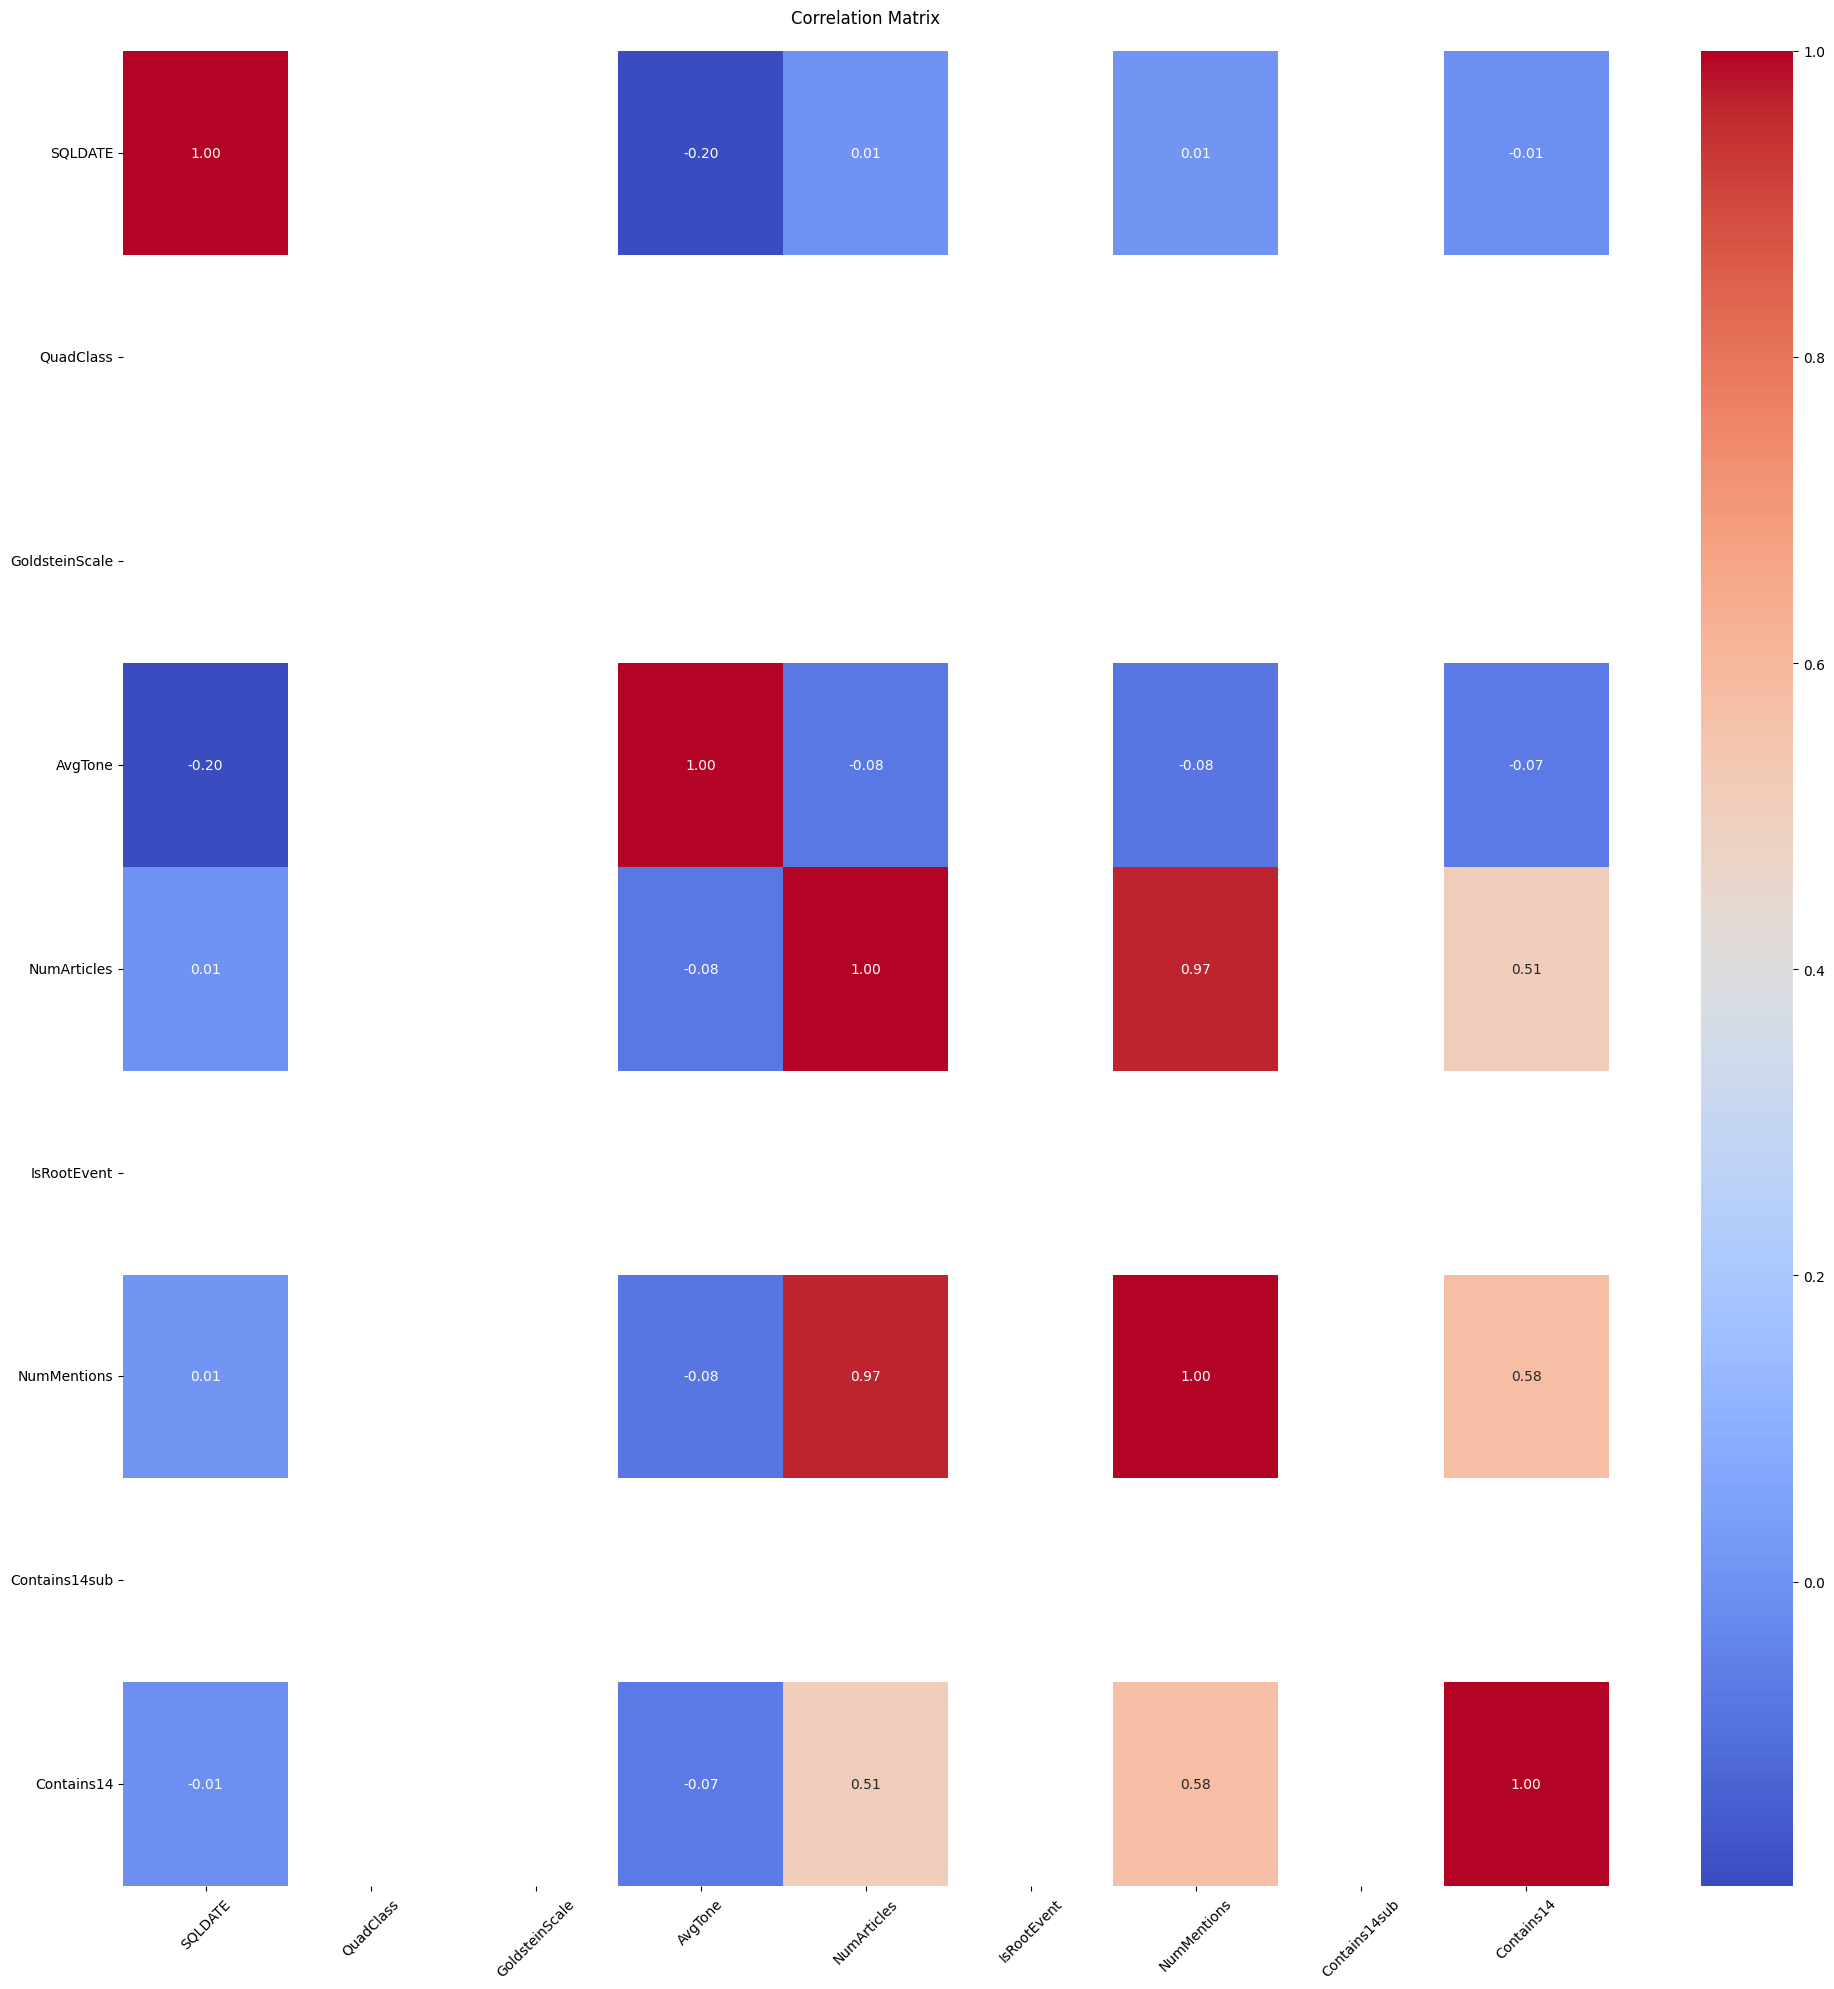

In [51]:


# import seaborn as sns
# import matplotlib.pyplot as plt
def correlation_matrix_plot(df):
    # Calculate correlation matrix
    corr_matrix = df.corr()

    # Set figure size
    plt.figure(figsize=(20, 20))

    # Generate heatmap with color-coded values
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")

    # Rotate tick labels for better visibility
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)

    # Add title and adjust padding
    plt.title('Correlation Matrix', pad=20)

    # Adjust margins
    plt.tight_layout()

    # Display the plot
    return plt.show()

correlation_matrix_plot(df_events)


In [52]:
df_events.head()


,SQLDATE,EventCode,QuadClass,GoldsteinScale,AvgTone,NumArticles,ActionGeo_CountryCode,IsRootEvent,NumMentions,Contains14sub,Contains14
384,20170427,1412,3,-6.5,-5.015679,12,HK,1,12,1,1
1728,20171001,1411,3,-6.5,-1.256732,10,HK,1,10,1,0
2459,20170427,1412,3,-6.5,-10.185185,10,HK,1,10,1,0
3125,20161114,1411,3,-6.5,-0.131062,1,HK,1,1,1,0
3181,20171203,1413,3,-6.5,-5.087719,10,HK,1,10,1,0


In [38]:
df_gkg.head()

type: name 'df_gkg' is not defined

Modify the time that records the events

In [ ]:
# Create a new column with modified information
df_gkg['Modified_GKGRECORDID'] = df_gkg['GKGRECORDID'].str.split('-').str[0]

print(df_gkg['Modified_GKGRECORDID'].min())
print(df_gkg['Modified_GKGRECORDID'].max())


In [ ]:
# df_events['DATEADDED'][0]

In [ ]:
# df_test = df_events.copy()
# df_test['DATEADDED'] = pd.to_datetime(df_test['DATEADDED'], format='%Y%m%d%H%M%S')
# df_test['DATEADDED'] = df_test['DATEADDED'].dt.strftime('%Y%m%d')

In [ ]:
# df_test['DATEADDED'].value_counts().sort_index().plot()
# plt.xlabel('DATEADDED')
# plt.ylabel('Count')
# plt.title('Frequency of DATEADDED')
# plt.show()


In [ ]:
print(df_events['SQLDATE'].max())
print(df_events['SQLDATE'].min())


# Process data new (START)

In [ ]:
# df_events_contains14.to_csv('events_FR_SP_AG_L_YM_cleaned_13_17_18_19_20.csv', index=False)

Import data

In [30]:
# df_events_contains14 = pd.read_csv('events_FR_SP_AG_L_YM_cleaned.csv', encoding='utf8', dtype={'EventCode': str})
# df_events_contains14 = pd.read_csv('events_IS_cleaned.csv', encoding='utf8', dtype={'EventCode': str})

In [76]:
df_events_contains14['ActionGeo_CountryCode'].value_counts()

HK    14588
Name: ActionGeo_CountryCode, dtype: int64

In [77]:
df_events_contains14.head()

,SQLDATE,EventCode,QuadClass,GoldsteinScale,AvgTone,NumArticles,ActionGeo_CountryCode,IsRootEvent,NumMentions,Contains14sub,Contains14
576,20170427,1412,3,-6.5,-5.015679,12,HK,1,12,1,1
1850,20171001,1411,3,-6.5,-1.256732,10,HK,1,10,1,0
2029,20161114,1411,3,-6.5,-0.131062,1,HK,1,1,1,0
4947,20170427,1412,3,-6.5,-10.185185,10,HK,1,10,1,0
5839,20171204,1413,3,-6.5,-5.508475,10,HK,1,10,1,0


In [78]:
# df_events_contains14.to_csv('events_FR_SP_AG_L_YM_cleaned_18_19_20.csv', index=False)

In [79]:
df_events_contains14['Contains14'].value_counts()

0    14023
1      565
Name: Contains14, dtype: int64

In [80]:
from sklearn.utils import resample


The process data function ensures each row is a unique date for a specfic country.

In [81]:
def process_data(df):
    unique_dates_df = df.copy()
    # unique_dates_df = df.drop_duplicates(subset='SQLDATE')
    unique_dates_df = df.drop_duplicates(subset=['SQLDATE', 'ActionGeo_CountryCode'])
    unique_dates_df.drop('IsRootEvent', axis=1, inplace=True)
    # unique_dates_df.drop('IsRootEvent', axis=1, inplace=True)
    unique_dates_df = unique_dates_df.sort_index()
    unique_dates_df.sort_values(by='SQLDATE', inplace=True)
    # df_upsampled = df_upsampled.sort_index()
    
    return unique_dates_df

unique_dates_df = process_data(df_events_contains14)


    

/var/tmp/ipykernel_7114/4036219549.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unique_dates_df.drop('IsRootEvent', axis=1, inplace=True)


In [82]:
unique_dates_df['Contains14'].value_counts()

0    2048
1      62
Name: Contains14, dtype: int64

In [83]:
df_events_contains14.head()

,SQLDATE,EventCode,QuadClass,GoldsteinScale,AvgTone,NumArticles,ActionGeo_CountryCode,IsRootEvent,NumMentions,Contains14sub,Contains14
576,20170427,1412,3,-6.5,-5.015679,12,HK,1,12,1,1
1850,20171001,1411,3,-6.5,-1.256732,10,HK,1,10,1,0
2029,20161114,1411,3,-6.5,-0.131062,1,HK,1,1,1,0
4947,20170427,1412,3,-6.5,-10.185185,10,HK,1,10,1,0
5839,20171204,1413,3,-6.5,-5.508475,10,HK,1,10,1,0


In [84]:
df_events_contains14['QuadClass'].value_counts()

3    14588
Name: QuadClass, dtype: int64

In [85]:
correlation_matrix_plot(df_events_contains14)

type: name 'correlation_matrix_plot' is not defined

In [86]:
unique_dates_df['Contains14'].value_counts()

0    2048
1      62
Name: Contains14, dtype: int64

In [87]:
unique_dates_df.head()

,SQLDATE,EventCode,QuadClass,GoldsteinScale,AvgTone,NumArticles,ActionGeo_CountryCode,NumMentions,Contains14sub,Contains14
496787,20150102,141,3,-6.5,-2.594340,2,HK,2,1,0
495647,20150111,141,3,-6.5,-3.607214,10,HK,10,1,0
488533,20150112,141,3,-6.5,-5.568445,20,HK,20,1,1
498671,20150113,141,3,-6.5,-1.229508,10,HK,10,1,0
490033,20150219,141,3,-6.5,-3.543307,1,HK,1,1,0


In [ ]:
# from statsmodels.graphics.tsaplots import plot_acf
# import matplotlib.pyplot as plt

# # Generate the autocorrelation plot
# fig, ax = plt.subplots()
# plot_acf(df_downsampled['Contains14'], lags=10, ax=ax)

# # Extract the y-values (autocorrelation values)
# y_values = ax.lines[1].get_ydata()
# x_values = ax.lines[1].get_xdata()

# d = {'x_values': x_values, 'y_values': y_values}
# plot_data = pd.DataFrame(data=d)
# plot_data = plot_data.drop(0)
# # plot_data = pd.DataFrame(x_values, y_values)
# # Print the y-values
# # print(y_values[1:].max())
# # print(plot_data.head())
# plot_data['x_values'][plot_data['y_values'].idxmax()]


# Test model (IGNORE)

In [49]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch
import torch.nn as nn

import torch.optim as optim
import torch.utils.data as data

In [50]:
# df = df_events_combine[['SQLDATE','protest']]
df = df_events_combine.loc[:, ('SQLDATE', 'Contains14')]
df.head()

type: name 'df_events_combine' is not defined

In [ ]:
df['protest'].value_counts()

In [ ]:
# df = pd.read_csv('airline-passengers.csv')

# # assuming the date column in your csv file is called 'Date'
df['SQLDATE'] = pd.to_datetime(df['SQLDATE'])
df.set_index('SQLDATE', inplace=True)

timeseries = df.copy()


# train-test split for time series
train_size = int(len(timeseries) * 0.67)
test_size = len(timeseries) - train_size
train, test = timeseries[:train_size], timeseries[train_size:]
train = train.astype(np.float32)
test = test.astype(np.float32)

In [ ]:
def create_dataset(dataset, lookback, n_future):
    X, y = [], []
    for i in range(len(dataset)-lookback-n_future+1):
        feature = dataset.iloc[i:i+lookback].values
        target = dataset.iloc[i+lookback:i+lookback+n_future].values
        X.append(feature)
        y.append(target)
    return torch.tensor(X).float(), torch.tensor(y).view(-1, n_future).float() # reshape y into (batch_size, n_future)


lookback = 2
n_future = 2
X_train, y_train = create_dataset(train, lookback=lookback, n_future=n_future)
X_test, y_test = create_dataset(test, lookback=lookback, n_future=n_future)

In [ ]:
y_test.size()

In [ ]:
class AirModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.lstm = nn.LSTM(input_size=1, hidden_size=50, num_layers=1, batch_first=True)
        self.linear = nn.Linear(50, n_future) # adjust the output size to match n_future
    def forward(self, x):
        x, _ = self.lstm(x)
        x = self.linear(x[:, -1, :]) # only consider the last output of LSTM for prediction
        return x

In [ ]:
model = AirModel()
optimizer = optim.Adam(model.parameters())
loss_fn = nn.MSELoss()
loader = data.DataLoader(data.TensorDataset(X_train, y_train), shuffle=True, batch_size=1000)

n_epochs = 2000
for epoch in range(n_epochs):
    model.train()
    for X_batch, y_batch in loader:
        y_pred = model(X_batch)
        # print(y_pred.size(), y_batch.size())
        loss = loss_fn(y_pred, y_batch)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    # Validation
    if epoch % 100 != 0:
        continue
    model.eval()
    with torch.no_grad():
        y_pred = model(X_train)
        train_rmse = torch.sqrt(loss_fn(y_pred, y_train))
        y_pred = model(X_test)
        test_rmse = torch.sqrt(loss_fn(y_pred, y_test))
    print("Epoch %d: train RMSE %.4f, test RMSE %.4f" % (epoch, train_rmse, test_rmse))

In [ ]:
with torch.no_grad():
    train_pred = model(X_train)
    test_pred = model(X_test)
    
# converting predictions to numpy
train_pred = train_pred.cpu().detach().numpy()
test_pred = test_pred.cpu().detach().numpy()

train_pred = train_pred.squeeze()
test_pred = test_pred.squeeze()



train_true = y_train.cpu().numpy()
test_true = y_test.cpu().numpy()


In [ ]:
# Adjusted start points for train and test data
train_start = lookback
test_start = len(train_pred) + lookback + n_future

# Create corresponding date indices for train and test predictions
train_pred_index = df.index[train_start:train_start + len(train_pred)]
test_pred_index = df.index[test_start:test_start + len(test_pred)]

# create new pandas dataframe for each future point
for i in range(n_future):
    print(i)
    train_pred_df = pd.DataFrame(train_pred[:, i], index=train_pred_index, columns=[f'Train Prediction {i+1}'])
    test_pred_df = pd.DataFrame(test_pred[:, i], index=test_pred_index, columns=[f'Test Prediction {i+1}'])
    
    # plot the original data and the training and test predictions
    plt.figure(figsize=(12, 6))
    plt.plot(df, label='Original data')
    plt.plot(train_pred_df, label=f'Train Prediction {i+1}')
    plt.plot(test_pred_df, label=f'Test Prediction {i+1}')
    plt.xlabel("Date")
    plt.ylabel("Passengers")
    plt.title(f"Predicted vs Actual Airline Passengers for Prediction {i+1}")
    plt.legend()
    plt.show()


Why are multiple graphs outputed? 

for example, the model is trained on n_lookback = 2 and n_future = 2. The models performance metric is calcualted based on this. The plot just say how does this model predict for 1 day in the future and the 2nd day in the future. **The performance score is based only for n_future = 2**.

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Adjusted start points for train and test data
train_start = lookback
test_start = len(train_pred) + lookback + n_future

# Create corresponding date indices for train and test predictions
train_pred_index = df.index[train_start:train_start + len(train_pred)]
test_pred_index = df.index[test_start:test_start + len(test_pred)]

# Create new pandas dataframe for each future point
for i in range(n_future):
    print(i)
    train_pred_df = pd.DataFrame(train_pred[:, i], index=train_pred_index, columns=[f'Train Prediction {i+1}'])
    test_pred_df = pd.DataFrame(test_pred[:, i], index=test_pred_index, columns=[f'Test Prediction {i+1}'])
    
    # Plot the original data and the training and test predictions
    plt.figure(figsize=(12, 6))
    plt.scatter(df.index, df['protest'], label='Original data', marker='o')
    plt.scatter(train_pred_df.index, train_pred_df[f'Train Prediction {i+1}'], label=f'Train Prediction {i+1}', marker='x')
    plt.scatter(test_pred_df.index, test_pred_df[f'Test Prediction {i+1}'], label=f'Test Prediction {i+1}', marker='x')
    plt.xlabel("Date")
    plt.ylabel("Passengers")
    plt.title(f"Predicted vs Actual Airline Passengers for Prediction {i+1}")
    plt.legend()
    plt.show()


# Test model LSTM classification (IGNORE)

In [ ]:
unique_dates_df.head()

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, precision_score, recall_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch
import torch.nn as nn

import torch.optim as optim
import torch.utils.data as data

In [ ]:
lstm_data = unique_dates_df.copy()
# lstm_data = df_downsampled.copy()
lstm_data = lstm_data[['SQLDATE','QuadClass','GoldsteinScale','AvgTone','NumArticles','Contains14']]  
lstm_data.set_index('SQLDATE')

In [ ]:
# lstm_data.head()

In [ ]:
# df = pd.read_csv('airline-passengers.csv')

# # assuming the date column in your csv file is called 'Date'
# df['SQLDATE'] = pd.to_datetime(df['SQLDATE'])
# df.set_index('SQLDATE', inplace=True)

timeseries = lstm_data.copy()
# timeseries = df_downsampled.copy()


# train-test split for time series
train_size = int(len(timeseries) * 0.67)
test_size = len(timeseries) - train_size
train, test = timeseries[:train_size], timeseries[train_size:]
train = train.astype(np.float32)
test = test.astype(np.float32)

In [ ]:
train.shape[0]

In [ ]:
def create_dataset(dataset, lookback, n_future, target_col):
    data = dataset.values
    X, y = [], []
    
    target_index = dataset.columns.get_loc(target_col)
    
    for i in range(len(dataset) - lookback - n_future + 1):
        feature = data[i:i+lookback]
        target = data[i+lookback:i+lookback+n_future, target_index]
        X.append(feature)
        y.append(target)
    
    X = np.array(X)
    y = np.array(y)
    
    return torch.from_numpy(X).float(), torch.from_numpy(y).float().view(-1, n_future)


In [ ]:
target_col = 'Contains14'  # Specify the name of the target column
lookback = 80
n_future = 1
X_train, y_train = create_dataset(train, lookback=lookback, n_future=n_future, target_col=target_col)
X_test, y_test = create_dataset(test, lookback=lookback, n_future=n_future, target_col=target_col)

n_features = X_train.size()[2]


In [ ]:
# def create_dataset(dataset, lookback, n_future):
#     data = dataset.values
#     X, y = [], []
    
#     for i in range(len(dataset) - lookback - n_future + 1):
#         feature = data[i:i+lookback]
#         target = data[i+lookback:i+lookback+n_future]
#         X.append(feature)
#         # print(X)
#         y.append(target)
#         # print(y)
    
#     X = np.array(X)
#     y = np.array(y)
    
#     return torch.from_numpy(X).float(), torch.from_numpy(y).float().view(-1, n_future)

# lookback = 3
# n_future = 1
# # num_classes = 2
# X_train, y_train = create_dataset(train, lookback=lookback, n_future=n_future)
# X_test, y_test = create_dataset(test, lookback=lookback, n_future=n_future)


In [ ]:
# print(y_test.tolist())

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

In [ ]:

# def create_dataset(dataset, lookback, n_future):
#     X = np.empty((len(dataset) - lookback - n_future + 1, lookback, dataset.shape[1]))
#     y = np.empty((len(dataset) - lookback - n_future + 1, n_future, dataset.shape[1]))

#     for i in range(len(dataset) - lookback - n_future + 1):
#         feature = dataset[i : i + lookback]
#         target = dataset[i + lookback : i + lookback + n_future]

#         X[i] = feature
#         y[i] = target

#     return torch.tensor(X).float(), torch.tensor(y).view(-1, n_future, dataset.shape[1]).float()


# lookback = 2
# n_future = 2

# # Convert train and test DataFrames to NumPy arrays
# train_array = train.values
# test_array = test.values

# X_train, y_train = create_dataset(train_array, lookback=lookback, n_future=n_future)
# X_test, y_test = create_dataset(test_array, lookback=lookback, n_future=n_future)

In [ ]:
# def create_dataset(dataset, lookback, n_future):
#     X, y = [], []
#     for i in range(len(dataset)-lookback-n_future+1):
#         feature = dataset.iloc[i:i+lookback].values
#         target = dataset.iloc[i+lookback:i+lookback+n_future].values
#         X.append(feature)
#         y.append(target)
#     return torch.tensor(X).float(), torch.tensor(y).view(-1, n_future).float() # reshape y into (batch_size, n_future)


# lookback = 2
# n_future = 2
# # num_classes = 2
# X_train, y_train = create_dataset(train, lookback=lookback, n_future=n_future)
# X_test, y_test = create_dataset(test, lookback=lookback, n_future=n_future)

In [ ]:
y_test.size()
y_train.size()
X_train.size()

In [ ]:
type(X_train.size()[2])

In [ ]:
class AirModel(nn.Module):
    def __init__(self):
        super().__init__()
        # self.lstm = nn.LSTM(input_size=1, hidden_size=50, num_layers=1, batch_first=True) 
        self.lstm = nn.LSTM(input_size=n_features, hidden_size=50, num_layers=1, batch_first=True)
        # self.dropout = nn.Dropout(0.1)
        self.linear = nn.Linear(50, n_future) # adjust the output size to match n_future
        # self.linear = nn.Linear(50, num_classes)
        # self.softmax = nn.softmax(dim=1)
    def forward(self, x):
        x, _ = self.lstm(x)
        # x = self.dropout(x)
        x = self.linear(x[:, -1, :]) # only consider the last output of LSTM for prediction
        return x

In [ ]:
# model = AirModel()
# # weight decay = l2 - model is very sensitive to this - bets so far 0.0005 - TUNE THIS PARAM
# # optimizer = optim.Adam(model.parameters(), weight_decay=0.0005)
# optimizer = optim.Adam(model.parameters(), weight_decay=0.001)
# # optimizer = optim.Adam(model.parameters())
# loss_fn = nn.BCEWithLogitsLoss()
# # imbalance_ratio = 10
# # class_weights = torch.tensor([imbalance_ratio])  # imbalance_ratio = (number of majority samples) / (number of minority samples)
# # loss_fn = nn.BCEWithLogitsLoss(weight=class_weights)
# loader = data.DataLoader(data.TensorDataset(X_train, y_train), shuffle=True, batch_size=16)

# n_epochs = 1000
# early_stopping_patience = 10000  # Number of epochs to wait for improvement in validation loss
# best_loss = float(0.00001)
# best_epoch = 0
# stop_training = False

# for epoch in range(n_epochs):
#     model.train()
#     for X_batch, y_batch in loader:
#         y_pred = model(X_batch)
#         loss = loss_fn(y_pred, y_batch)
#         optimizer.zero_grad()
#         loss.backward()
#         optimizer.step()

#     # Validation
#     if epoch % 100 != 0:
#         continue
#     model.eval()
#     with torch.no_grad():
#         y_pred = model(X_train)
#         train_preds = torch.round(torch.sigmoid(y_pred))
#         train_loss = loss_fn(y_pred, y_train)
#         train_acc = accuracy_score(y_train, train_preds)
#         train_f1 = f1_score(y_train, train_preds)
        
#         y_pred = model(X_test)
#         test_preds = torch.round(torch.sigmoid(y_pred))
#         test_loss = loss_fn(y_pred, y_test)
#         test_acc = accuracy_score(y_test, test_preds)
#         test_f1 = f1_score(y_test, test_preds)


#     print("Epoch %d: train loss %.4f, train accuracy %.4f, train F1 score %.4f, test loss %.4f, test accuracy %.4f, test F1 score %.4f" % (epoch, train_loss, train_acc, train_f1, test_loss, test_acc, test_f1))

#     # Check if test loss has improved
#     if test_loss < best_loss:
#         best_loss = test_loss
#         best_epoch = epoch
#         stop_training = False
#     else:
#         stop_training = True

#     # Early stopping condition
#     if stop_training and (epoch - best_epoch) >= early_stopping_patience:
#         print("Early stopping at epoch %d" % epoch)
#         break
# confusion_mat = confusion_matrix(y_test, test_preds)
# print("Confusion Matrix:")
# print(confusion_mat)


In [ ]:
majority_class_count = unique_dates_df['Contains14'].value_counts().values[0]
minority_class_count = unique_dates_df['Contains14'].value_counts().values[1]
imbalance_ratio = majority_class_count/minority_class_count
print(imbalance_ratio)

In [ ]:
metrics_list = []
threshold = 0.5  # Custom threshold value between 0 and 1
model = AirModel()
optimizer = optim.Adam(model.parameters(), weight_decay=0.01)
# optimizer = optim.SGD(model.parameters(), lr=0.1, weight_decay=-0.01)
# loss_fn = nn.BCEWithLogitsLoss()

# imbalance_ratio = 14
# imbalance_ratio = (number of majority samples) / (number of minority samples)
class_weights = torch.tensor([imbalance_ratio])  # imbalance_ratio = (number of majority samples) / (number of minority samples)
loss_fn = nn.BCEWithLogitsLoss(weight=class_weights)

loader = data.DataLoader(data.TensorDataset(X_train, y_train), shuffle=True, batch_size=64)

n_epochs = 500
early_stopping_patience = 10000  # Number of steps to wait for improvement in validation loss
best_loss = float('inf')
best_epoch = 0
stop_training = False
no_improvement_count = 0

for epoch in range(n_epochs):
    model.train()
    for X_batch, y_batch in loader:
        y_pred = model(X_batch)
        loss = loss_fn(y_pred, y_batch)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Validation
    if epoch % 100 != 0:
        continue
    model.eval()
    with torch.no_grad():
        y_pred = model(X_train)
        # train_preds = torch.round(torch.sigmoid(y_pred))
        
        
        

        sigmoid_output = torch.sigmoid(y_pred)
        train_preds = (sigmoid_output >= threshold).float()
        train_preds = torch.round(train_preds)


        
        train_loss = loss_fn(y_pred, y_train)
        train_acc = accuracy_score(y_train, train_preds)
        if n_future > 1:
            train_f1 = f1_score(y_train, train_preds, average = 'weighted')
            train_precision = precision_score(y_train, train_preds, average = 'weighted')
            train_recall = recall_score(y_train, train_preds, average = 'weighted')
        else:
            train_f1 = f1_score(y_train, train_preds)
            train_precision = precision_score(y_train, train_preds)
            train_recall = recall_score(y_train, train_preds)
        
        y_pred = model(X_test)
        # test_preds = torch.round(torch.sigmoid(y_pred))

        sigmoid_output = torch.sigmoid(y_pred)
        test_preds = (sigmoid_output >= threshold).float()
        test_preds = torch.round(test_preds)

        
        test_loss = loss_fn(y_pred, y_test)
        test_acc = accuracy_score(y_test, test_preds)
        if n_future > 1:
            test_f1 = f1_score(y_test, test_preds, average = 'weighted')
            test_precision = precision_score(y_test, test_preds, average = 'weighted')
            test_recall = recall_score(y_test, test_preds, average = 'weighted')
        else:
            test_f1 = f1_score(y_test, test_preds)
            test_precision = precision_score(y_test, test_preds)
            test_recall = recall_score(y_test, test_preds)
    
    metrics_dict = {'Epoch': epoch, 
                    'Train Loss': train_loss.item(), 'Train Accuracy': train_acc, 
                    'Train Precision': train_precision, 'Train Recall': train_recall,
                    'Train F1 Score': train_f1,
                    'Test Loss': test_loss.item(), 'Test Accuracy': test_acc, 
                    'Test Precision': test_precision, 'Test Recall': test_recall,
                    'Test F1 Score': test_f1}
    metrics_list.append(metrics_dict)

    print("Epoch %d: train loss %.4f, train accuracy %.4f, train F1 score %.4f, test loss %.4f, test accuracy %.4f, test F1 score %.4f" % (epoch, train_loss, train_acc, train_f1, test_loss, test_acc, test_f1))

    # Check if test loss has improved
    if test_loss < best_loss:
        best_loss = test_loss
        best_epoch = epoch
        no_improvement_count = 0
    else:
        no_improvement_count += 1

    # Early stopping condition
    if no_improvement_count >= early_stopping_patience:
        print("Early stopping at epoch %d" % epoch)
        stop_training = True
        break

    # Update best loss and epoch if there is an improvement
    if test_loss < best_loss:
        best_loss = test_loss
        best_epoch = epoch

    # Stop training if the early stopping condition is met
    if stop_training:
        break
if n_future == 1:
    confusion_mat = confusion_matrix(y_test, test_preds)
    print("Confusion Matrix:")
    print(confusion_mat)
else:
    print('Can not use confusion matrix')

metrics_table = pd.DataFrame(metrics_list)




In [ ]:
print(metrics_table.iloc[-1])

In [ ]:
with torch.no_grad():
    train_pred = model(X_train)
    train_pred = torch.round(torch.sigmoid(train_pred))
    test_pred = model(X_test)
    test_pred = torch.round(torch.sigmoid(test_pred))
    
# converting predictions to numpy
train_pred = train_pred.cpu().detach().numpy()
test_pred = test_pred.cpu().detach().numpy()

train_pred = train_pred.squeeze()
test_pred = test_pred.squeeze()



train_true = y_train.cpu().numpy()
test_true = y_test.cpu().numpy()


Why are multiple graphs outputed? 

for example, the model is trained on n_lookback = 2 and n_future = 2. The models performance metric is calcualted based on this. The plot just say how does this model predict for 1 day in the future and the 2nd day in the future. **The performance score is based only for n_future = 2**.

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Adjusted start points for train and test data
train_start = lookback
test_start = len(train_pred) + lookback + n_future

# Create corresponding date indices for train and test predictions
train_pred_index = df.index[train_start:train_start + len(train_pred)]
test_pred_index = df.index[test_start:test_start + len(test_pred)]

# Create new pandas dataframe for each future point
for i in range(n_future):
    print(i)
    train_pred_df = pd.DataFrame(train_pred[:, i], index=train_pred_index, columns=[f'Train Prediction {i+1}'])
    test_pred_df = pd.DataFrame(test_pred[:, i], index=test_pred_index, columns=[f'Test Prediction {i+1}'])
    
    # Plot the original data and the training and test predictions
    plt.figure(figsize=(12, 6))
    plt.scatter(df_downsampled.index.get_level_values(1), df_downsampled['Contains14'], label='Original data', marker='o')
    plt.scatter(train_pred_df.index, train_pred_df[f'Train Prediction {i+1}'], label=f'Train Prediction {i+1}', marker='x')
    plt.scatter(test_pred_df.index, test_pred_df[f'Test Prediction {i+1}'], label=f'Test Prediction {i+1}', marker='x')
    plt.xlabel("Date")
    plt.ylabel("Passengers")
    plt.title(f"Predicted vs Actual Protests for Prediction {i+1}")
    plt.legend()
    plt.show()


In [ ]:
df_downsampled.index.get_level_values(1)

In [ ]:
import pandas as pd
import xgboost as xgb
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

def train_evaluate_model(model, X_train, X_test, y_train, y_test, class_weights):
    # Set the parameters for the model
    if isinstance(model, xgb.XGBClassifier):
        params = {
            'objective': 'binary:logistic',  # Binary classification objective
            'eval_metric': 'error',  # Evaluation metric for classification
            'scale_pos_weight': class_weights  # Adjusts the weights of positive class instances
        }
    elif isinstance(model, CatBoostClassifier):
        params = {
            'eval_metric': 'Accuracy',  # Evaluation metric for classification
            'class_weights': [1, class_weights]  # Adjusts the weights of positive class instances
        }
    elif isinstance(model, RandomForestClassifier):
        params = {
            'class_weight': {0: 1, 1: class_weights}  # Adjusts the weights of positive class instances
        }
    else:
        raise ValueError('Invalid model type. Supported models: xgboost, catboost, random forest')

    # Train the model
    model.fit(X_train, y_train)

    # Make predictions on the test set
    preds = model.predict(X_test)
    pred_labels = [round(pred) for pred in preds]

    # Evaluate the accuracy and F1 score of the model
    accuracy = accuracy_score(y_test, pred_labels)
    f1 = f1_score(y_test, pred_labels)
    print('Accuracy:', accuracy)
    print('F1 Score:', f1)

    # Plot the confusion matrix
    cm = confusion_matrix(y_test, pred_labels)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

# data
df = unique_dates_df
# df = df_downsampled 

# Create lagged features
lookback = 20
for i in range(1, lookback+1):
    df[f'lag_{i}'] = df['Contains14'].shift(i)

# Drop rows with missing values
df.dropna(inplace=True)

# Split the data into features (X) and labels (y)
X = df.iloc[:, 2:]  # Exclude the date column
y = df['Contains14']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Calculate class weights for handling class imbalance
class_counts = y_train.value_counts()
class_weights = class_counts[0] / class_counts[1]

# Create and train the models
xgb_model = xgb.XGBClassifier()
catboost_model = CatBoostClassifier(verbose=0)
rf_model = RandomForestClassifier()

# Train and evaluate the XGBoost model
print('XGBoost:')
train_evaluate_model(xgb_model, X_train, X_test, y_train, y_test, class_weights)

# Train and evaluate the CatBoost model
print('CatBoost:')
train_evaluate_model(catboost_model, X_train, X_test, y_train, y_test, class_weights)

# Train and evaluate the Random Forest model
print('Random Forest:')
train_evaluate_model(rf_model, X_train, X_test, y_train, y_test, class_weights)




# Models multi country

In [88]:
# unique_dates_df.to_csv('events_FR_SP_AG_L_YM_processed.csv', index=False)

In [89]:
# unique_dates_df = pd.read_csv('events_HK_processed_18.csv', encoding='utf8', dtype={'EventCode': str})

In [90]:
unique_dates_df.head()

,SQLDATE,EventCode,QuadClass,GoldsteinScale,AvgTone,NumArticles,ActionGeo_CountryCode,NumMentions,Contains14sub,Contains14
496787,20150102,141,3,-6.5,-2.594340,2,HK,2,1,0
495647,20150111,141,3,-6.5,-3.607214,10,HK,10,1,0
488533,20150112,141,3,-6.5,-5.568445,20,HK,20,1,1
498671,20150113,141,3,-6.5,-1.229508,10,HK,10,1,0
490033,20150219,141,3,-6.5,-3.543307,1,HK,1,1,0


The below code label encodes the country codes to be used as a feature in the model. Sorts the data in terms of date. Then groups the data in terms of country code and then groups each country in terms of date. The features are lagged for each country and the target is pushed forward by a speciifed amount.

In [91]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
n_future = 1
n_past = 100
rolling_mean_window_week = 7
rolling_mean_window_month = 28
# Step 1: Create a unique date-country identifier
# df = df_events_contains14.copy()
df = unique_dates_df.copy()
label_encoder_country = LabelEncoder()
df['country_code_encoded'] = label_encoder_country.fit_transform(df['ActionGeo_CountryCode'])
df = df.drop('ActionGeo_CountryCode', axis=1)

# Upsample data at a daily frequency
df['SQLDATE'] = pd.to_datetime(df['SQLDATE'], format='%Y%m%d')
df = df.set_index('SQLDATE')
df = df.groupby('country_code_encoded').resample('D').fillna(method='ffill')
# df = df.reset_index()


# Step 2: Sort the data
# df['SQLDATE'] = pd.to_datetime(df['SQLDATE'], format='%Y%m%d')
df.sort_values(by='SQLDATE', inplace=True)

# Step 3: Group the data by date
grouped = df.groupby('SQLDATE')

# Step 4: Handle multiple countries on the same date
df_multi_country_date = grouped.apply(lambda group: group if len(group) == 1 else group.reset_index(drop=True))
df_multi_country_date = df_multi_country_date.rename_axis(index={'SQLDATE': 'date_index', 'country_code_encoded':'country_code_encoded_index'})

# Step 5: Apply lag feature engineering


# df_multi_country_date['lag_fut_Contains14 ' + str(n_future)] = df_multi_country_date.groupby('country_code_encoded')['Contains14'].shift(-n_future)

# # rolling mean of target
# df_multi_country_date['Contains14_rolling_mean_' + str(rolling_mean_window_week)] = df_multi_country_date.groupby('country_code_encoded')['Contains14'].rolling(window=rolling_mean_window_week).mean().reset_index(level=0, drop=True)
# df_multi_country_date['Contains14_rolling_mean_' + str(rolling_mean_window_month)] = df_multi_country_date.groupby('country_code_encoded')['Contains14'].rolling(window=rolling_mean_window_month).mean().reset_index(level=0, drop=True)
# # columns defined below are lagged and used as features
# df_lag_columns = pd.DataFrame()
# for i in range(1, n_past + 1):
#     df_lag_columns = pd.concat([
#         df_lag_columns,
#         # df_multi_country_date.groupby('country_code_encoded')['QuadClass'].shift(i).rename('lag_QuadClass_' + str(i)),
#         # df_multi_country_date.groupby('country_code_encoded')['GoldsteinScale'].shift(i).rename('lag_GoldsteinScale_' + str(i)),
#         # df_multi_country_date.groupby('country_code_encoded')['AvgTone'].shift(i).rename('lag_AvgTone_' + str(i)),
#         # df_multi_country_date.groupby('country_code_encoded')['NumArticles'].shift(i).rename('lag_NumArticles_' + str(i)),
#         df_multi_country_date.groupby('country_code_encoded')['Contains14'].shift(i).rename('lag_Contains14_' + str(i))
#     ], axis=1)

# df_multi_country_date = pd.concat([df_multi_country_date, df_lag_columns], axis=1)

df_multi_country_date = df_multi_country_date.reset_index()
# # print(df_multi_country_date.head())
# # You may have to change the level 1 part to level 0 depending on the df
df_multi_country_date.rename(columns={'date_index': 'SQLDATE'}, inplace=True)
# df_multi_country_date.rename(columns={'level_0': 'SQLDATE'}, inplace=True)
df_multi_country_date['Year'] = df_multi_country_date['SQLDATE'].dt.year
df_multi_country_date['Month'] = df_multi_country_date['SQLDATE'].dt.month
df_multi_country_date['DayOfMonth'] = df_multi_country_date['SQLDATE'].dt.day

df_multi_country_date = df_multi_country_date.dropna()


/var/tmp/ipykernel_7114/1567826995.py:29: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df_multi_country_date = grouped.apply(lambda group: group if len(group) == 1 else group.reset_index(drop=True))


In [92]:
df_multi_country_date.head()

,country_code_encoded_index,SQLDATE,EventCode,QuadClass,GoldsteinScale,AvgTone,NumArticles,NumMentions,Contains14sub,Contains14,country_code_encoded,Year,Month,DayOfMonth
0,0,2015-01-02,141,3,-6.5,-2.59434,2,2,1,0,0,2015,1,2
1,0,2015-01-03,141,3,-6.5,-2.59434,2,2,1,0,0,2015,1,3
2,0,2015-01-04,141,3,-6.5,-2.59434,2,2,1,0,0,2015,1,4
3,0,2015-01-05,141,3,-6.5,-2.59434,2,2,1,0,0,2015,1,5
4,0,2015-01-06,141,3,-6.5,-2.59434,2,2,1,0,0,2015,1,6


In [93]:
df_multi_country_date['Contains14'].value_counts()

0    2978
1      84
Name: Contains14, dtype: int64

In [94]:
df_multi_country_date.to_csv('events_HK_with_date.csv', index=False)

In [87]:
# outliers look at

In [88]:
df_plot = df_multi_country_date[(df_multi_country_date['Year'] <= 2015)  (df_multi_country_date['Month'] <= 3)]


type: 'Series' object is not callable

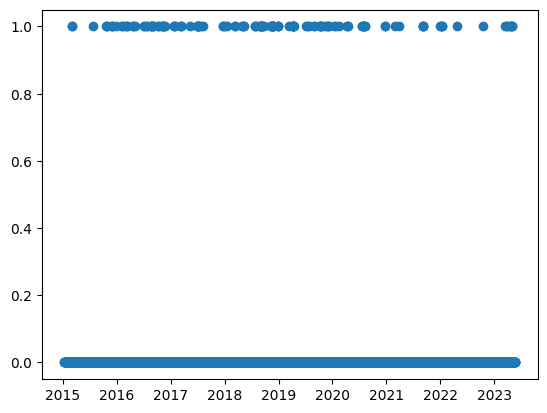

In [89]:
df_plot = df_multi_country_date[(df_multi_country_date['Year'] <= 2015) & (df_multi_country_date['Month'] <= 3)]
X = df_multi_country_date['SQLDATE']
Y = df_multi_country_date['Contains14']
plt.scatter(X, Y)

/var/tmp/ipykernel_4331/518368204.py:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df_multi_country_date['Week'] = df_multi_country_date['SQLDATE'].dt.week


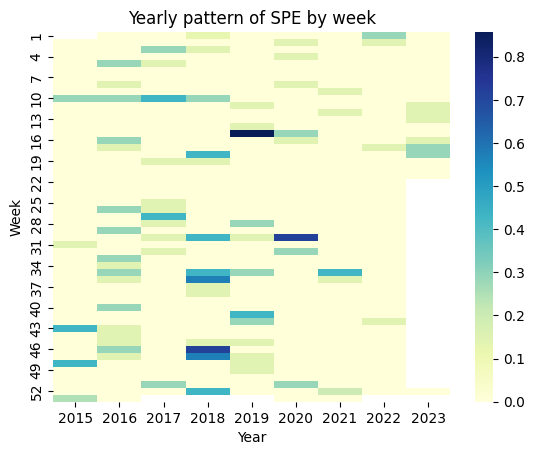

In [90]:
import seaborn as sns

df_multi_country_date['Year'] = df_multi_country_date['SQLDATE'].dt.year
df_multi_country_date['Week'] = df_multi_country_date['SQLDATE'].dt.week

heatmap_data = df_multi_country_date.pivot_table(index='Week', columns='Year', values='Contains14', aggfunc='mean')
sns.heatmap(heatmap_data, cmap='YlGnBu')
plt.title('Yearly pattern of SPE by week')
plt.savefig('Heatmap.png', dpi=300, bbox_inches='tight') 
plt.show()



/var/tmp/ipykernel_4331/2631443574.py:17: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  monthly_mean = df_multi_country_date.resample('M', on='SQLDATE').mean()


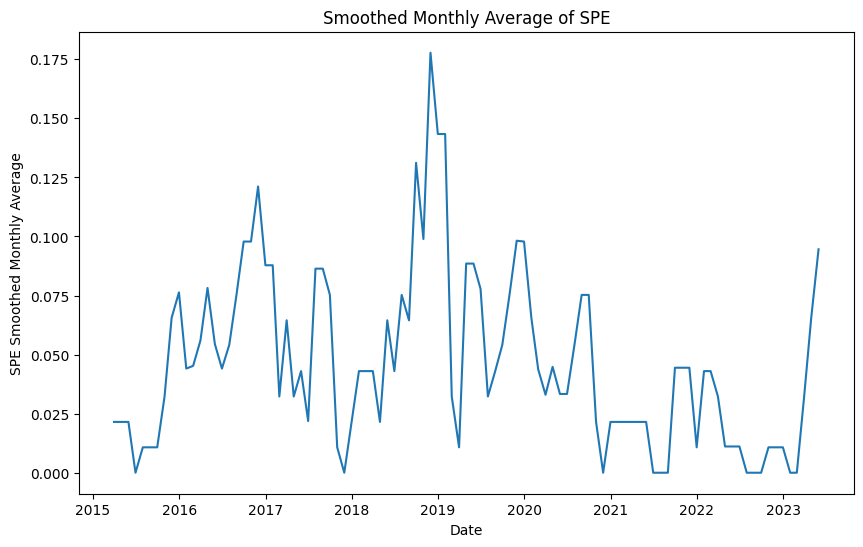

In [91]:
# # 1. Resample the data on a monthly basis.
# monthly_mean = df_multi_country_date.resample('M', on='SQLDATE').mean()

# # 2. Apply a rolling average. Let's use a window of 3 months for the smoothing.
# smoothed = monthly_mean['Contains14'].rolling(window=3).mean()

# # 3. Plot the smoothed data.
# plt.plot(monthly_mean.index, smoothed)
# plt.xlabel('Date')
# plt.ylabel('SPE smoothed monthly average')
# plt.title('Smoothed Monthly Average of Contains14')
# plt.show()
# plt.savefig('Month plot')


# 1. Resample the data on a monthly basis.
monthly_mean = df_multi_country_date.resample('M', on='SQLDATE').mean()

# 2. Apply a rolling average. Let's use a window of 3 months for the smoothing.
smoothed = monthly_mean['Contains14'].rolling(window=3).mean()

# 3. Plot the smoothed data.
plt.figure(figsize=(10,6))  # Optional: You can adjust the size of the figure
plt.plot(monthly_mean.index, smoothed)
plt.xlabel('Date')
plt.ylabel('SPE Smoothed Monthly Average')
plt.title('Smoothed Monthly Average of SPE')

# Save the figure to a file.
plt.savefig('smoothed_monthly_average.png', dpi=300, bbox_inches='tight')  # Saves with high dpi and adjusts the bounding box

plt.show()


In [92]:
df_multi_country_date[df_multi_country_date['country_code_encoded'] == 0].corr()['Contains14'].abs().sort_values(ascending=False)

/var/tmp/ipykernel_4331/2591736777.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_multi_country_date[df_multi_country_date['country_code_encoded'] == 0].corr()['Contains14'].abs().sort_values(ascending=False)


Contains14                    1.000000
NumMentions                   0.618929
NumArticles                   0.441186
AvgTone                       0.069740
Year                          0.044105
Month                         0.041271
Week                          0.038076
GoldsteinScale                0.030156
DayOfMonth                    0.010534
country_code_encoded_index         NaN
QuadClass                          NaN
Contains14sub                      NaN
country_code_encoded               NaN
Name: Contains14, dtype: float64

type: 'Contains14_rolling_mean_28'

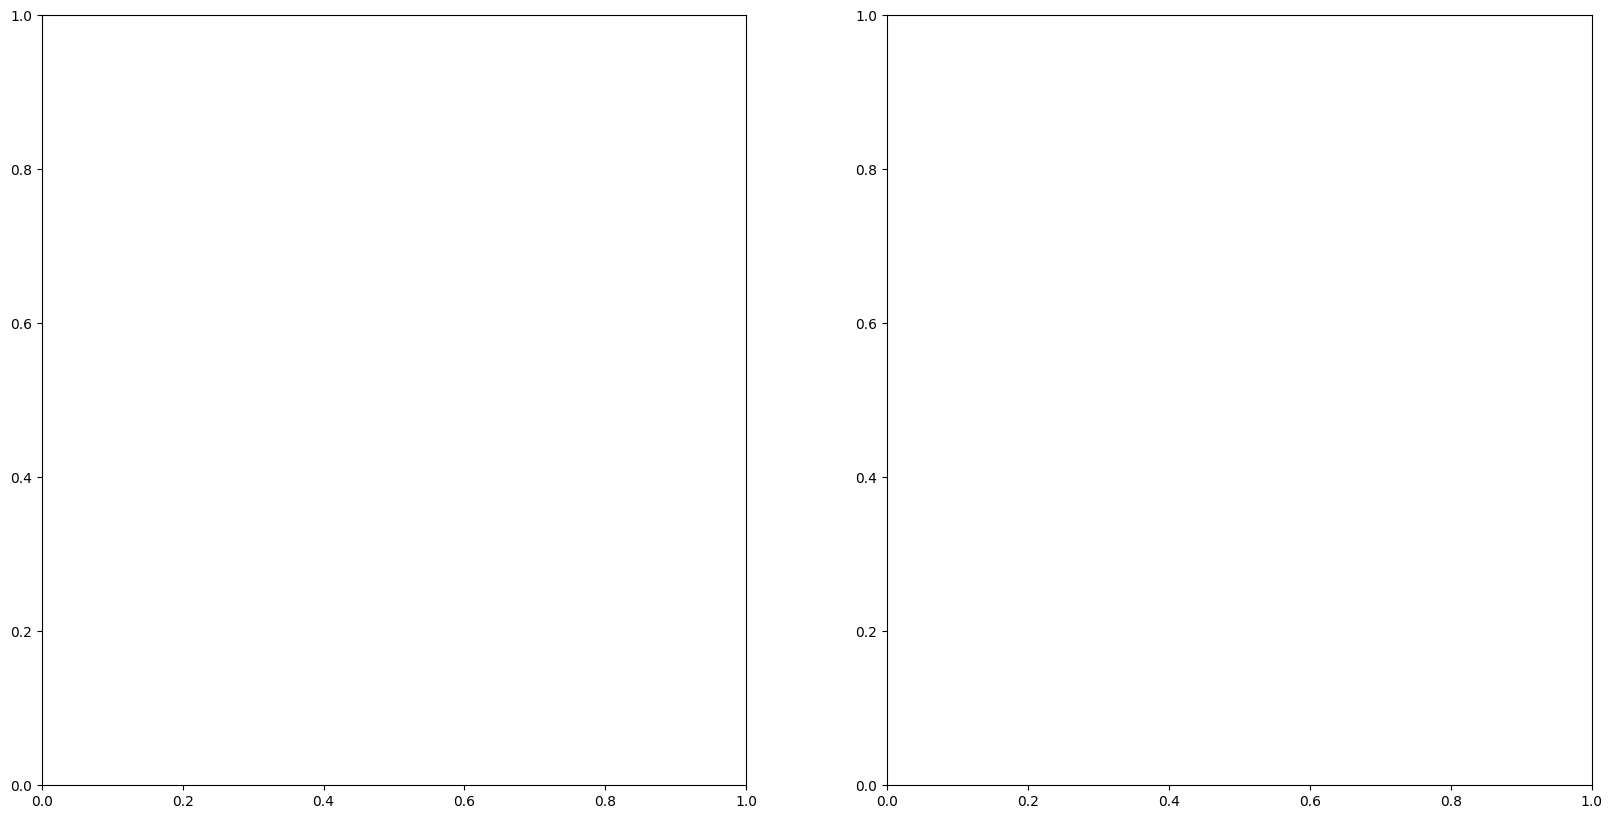

In [93]:
def bin_plotter(column_name, target_column):
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,10))
    df_multi_country_date.groupby([pd.qcut(df_multi_country_date[column_name].rank(method='first'), 10, labels=range(10))])[[target_column]].mean().plot(ax=ax1)
    df_multi_country_date.groupby([pd.qcut(df_multi_country_date[column_name].rank(method='first'), 10, labels=range(10))])[[column_name]].mean().plot(ax=ax2)
    return plt.show()

bin_plotter('Contains14_rolling_mean_28', 'lag_fut_Contains14 1')

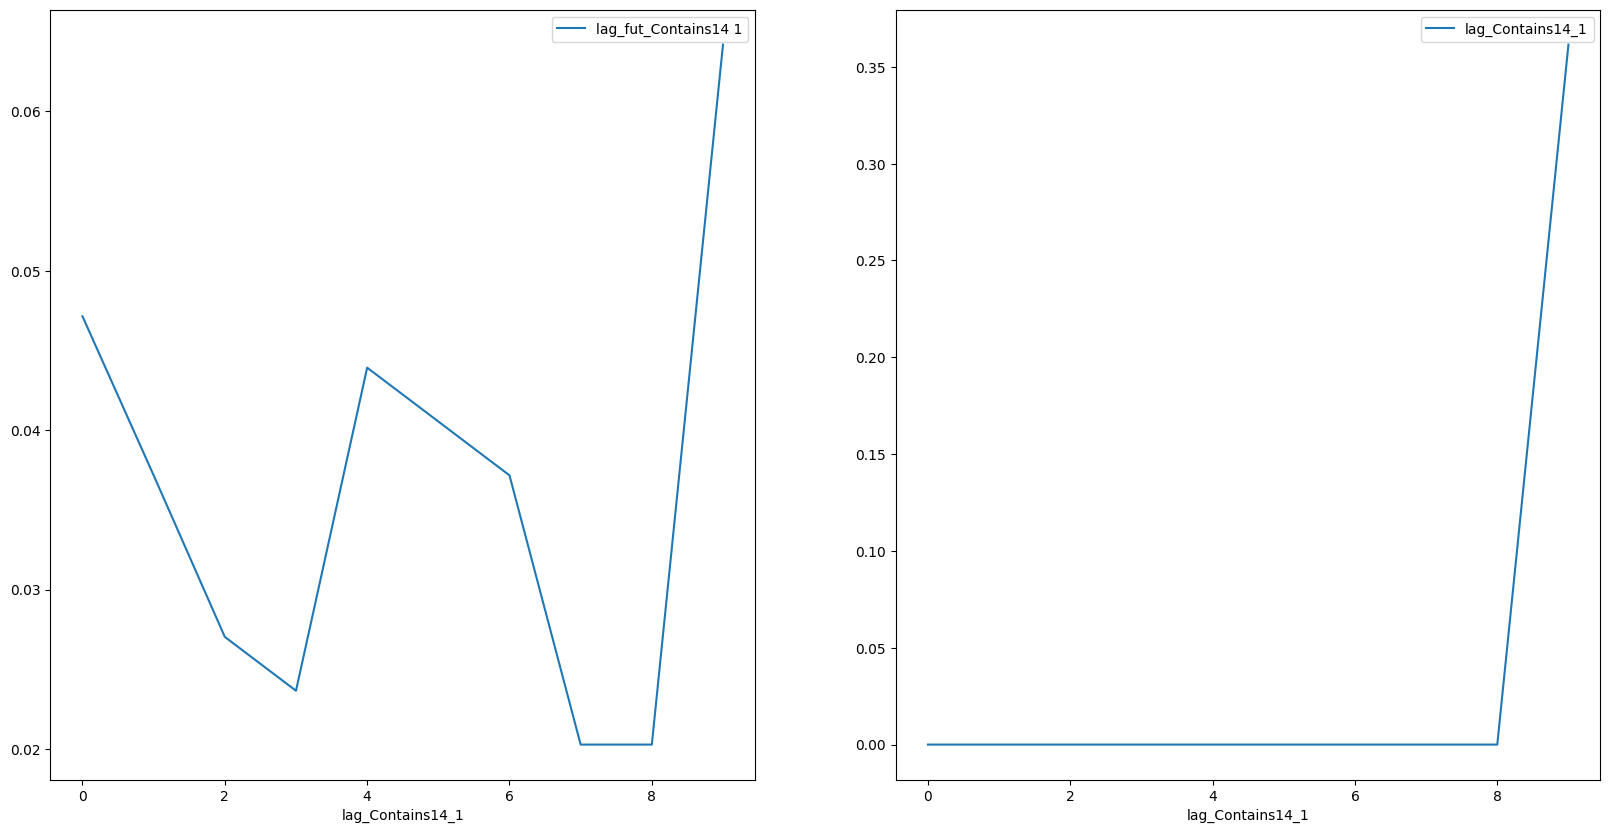

In [63]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,10))
df_multi_country_date.groupby([pd.qcut(df_multi_country_date['lag_Contains14_1'].rank(method='first'), 10, labels=range(10))])[['lag_fut_Contains14 1']].mean().plot(ax=ax1)
df_multi_country_date.groupby([pd.qcut(df_multi_country_date['lag_Contains14_1'].rank(method='first'), 10, labels=range(10))])[['lag_Contains14_1']].mean().plot(ax=ax2)
plt.show()

<AxesSubplot: xlabel='DayOfMonth'>

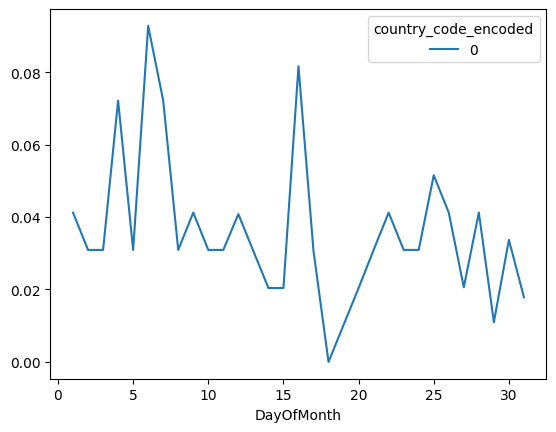

In [64]:
df_multi_country_date.groupby(['DayOfMonth', 'country_code_encoded'])['lag_fut_Contains14 1'].mean().unstack(level=1).plot()

In [295]:
# correlation_matrix_plot(df_multi_country_date)

In [100]:
df_multi_country_date['Contains14'].value_counts()

0    2854
1     107
Name: Contains14, dtype: int64

In [297]:
# df_multi_country_date['Year'][0]

In [298]:
# # X = df_processed = df_multi_country_date.loc[:, df_multi_country_date.columns != ['QuadClass','GoldsteinScale','AvgTone','NumArticles','ActionGeo_CountryCode', 'Contains14', 
# #                                                 'lag_Contains14 ' + str(n_future)]]

# columns_to_exclude = ['QuadClass','GoldsteinScale','AvgTone','NumArticles','ActionGeo_CountryCode', 'Contains14', 
#                                                 'lag_Contains14 ' + str(n_future), 'SQLDATE','EventCode','date_country']
# X = df_multi_country_date.loc[:, ~df_multi_country_date.columns.isin(columns_to_exclude)]

# X.head()

## tsfresh feature extraction 

In [299]:
df_tsfresh = pd.read_csv('events_FR_SP_AG_L_YM_processed.csv', encoding='utf8', dtype={'EventCode': int})
df_tsfresh.head()

,SQLDATE,level_1,EventCode,QuadClass,GoldsteinScale,AvgTone,NumArticles,Contains14,country_code_encoded,Year,Month,DayOfMonth
0,2015-01-02,0,42,1,1.9,-4.423868,2,0,0,2015,1,2
1,2015-01-02,1,1831,4,-10.0,-5.039788,10,0,3,2015,1,2
2,2015-01-02,2,1123,3,-2.0,-8.681672,5,0,1,2015,1,2
3,2015-01-02,3,195,4,-10.0,-3.472222,10,0,4,2015,1,2
4,2015-01-02,4,90,2,-2.0,-4.504505,4,0,2,2015,1,2


In [300]:
df_tsfresh['Contains14_rolling_mean'] = df_tsfresh['Contains14'].rolling(window=4).mean()

In [301]:
df_tsfresh.head()

,SQLDATE,level_1,EventCode,QuadClass,GoldsteinScale,AvgTone,NumArticles,Contains14,country_code_encoded,Year,Month,DayOfMonth,Contains14_rolling_mean
0,2015-01-02,0,42,1,1.9,-4.423868,2,0,0,2015,1,2,NaN
1,2015-01-02,1,1831,4,-10.0,-5.039788,10,0,3,2015,1,2,NaN
2,2015-01-02,2,1123,3,-2.0,-8.681672,5,0,1,2015,1,2,NaN
3,2015-01-02,3,195,4,-10.0,-3.472222,10,0,4,2015,1,2,0.0
4,2015-01-02,4,90,2,-2.0,-4.504505,4,0,2,2015,1,2,0.0


In [302]:
# df_tsfresh['SQLDATE'] = pd.to_datetime(df_tsfresh['SQLDATE'], format='%Y%m%d')

# df_tsfresh['SQLDATE'].strftime("%Y%m%d%H%M%S")

In [303]:
from tsfresh import extract_relevant_features
from tsfresh.utilities.dataframe_functions import roll_time_series


df_tsfresh = df_tsfresh[['SQLDATE', 'GoldsteinScale', 'country_code_encoded', 'Contains14']]
df_rolled = roll_time_series(df_tsfresh, column_id="country_code_encoded", column_sort="SQLDATE")


# print(X.head())
#     # column_id="id", column_sort="time", column_kind=None, column_value=None
# features_filtered_direct = extract_relevant_features(X,
#                                                      column_id='country_code_encoded', column_sort='SQLDATE',column_kind=None, column_value=None)

Rolling: 100%|██████████| 40/40 [00:20<00:00,  1.91it/s]


In [304]:
# df_tsfresh[df_tsfresh['country_code_encoded'] == 0].head()

In [305]:
# df_rolled.head()

In [306]:
# from tsfresh import extract_features
# from tsfresh.feature_extraction import MinimalFeatureExtractionSettings
from tsfresh.feature_extraction import EfficientFCParameters, MinimalFCParameters
# df_features = extract_features(df_rolled, column_id="country_code_encoded", column_sort="SQLDATE", feature_extraction_settings = MinimalFeatureExtractionSettings())


df_features = extract_features(df_rolled,column_id="country_code_encoded", column_sort="SQLDATE", default_fc_parameters=EfficientFCParameters())

Feature Extraction:   0%|          | 0/15 [00:00<?, ?it/s]Process ForkPoolWorker-61:
Process ForkPoolWorker-62:
Feature Extraction:   0%|          | 0/15 [01:30<?, ?it/s]Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/multiprocessing/process.py", line 314, in _bootstrap
    self.run()
Traceback (most recent call last):
Process ForkPoolWorker-59:
Process ForkPoolWorker-58:
  File "/opt/conda/lib/python3.10/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/opt/conda/lib/python3.10/multiprocessing/process.py", line 314, in _bootstrap
    self.run()
  File "/opt/conda/lib/python3.10/multiprocessing/pool.py", line 114, in worker
    task = get()
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/multiprocessing/pool.py", line 114, in worker
   

KeyboardInterrupt: 

In [1]:
import pandas as pd
df = pd.DataFrame({
   "id": [1, 1, 1, 1, 2, 2],
   "time": [1, 2, 3, 4, 8, 9],
   "x": [1, 2, 3, 4, 10, 11],
   "y": [5, 6, 7, 8, 12, 13],
})

from tsfresh.utilities.dataframe_functions import roll_time_series
df_rolled = roll_time_series(df, column_id="id", column_sort="time")
from tsfresh import extract_features
df_features = extract_features(df_rolled, column_id="id", column_sort="time")

Feature Extraction: 100%|██████████| 12/12 [00:00<00:00, 88.45it/s]


In [2]:
df_features.head()

y__variance_larger_than_standard_deviation  y__has_duplicate_max  \
1 1                                         0.0                   0.0   
  2                                         0.0                   0.0   
  3                                         0.0                   0.0   
  4                                         1.0                   0.0   
2 8                                         0.0                   0.0   

     y__has_duplicate_min  y__has_duplicate  y__sum_values  y__abs_energy  \
1 1                   0.0               0.0            5.0           25.0   
  2                   0.0               0.0           11.0           61.0   
  3                   0.0               0.0           18.0          110.0   
  4                   0.0               0.0           26.0          174.0   
2 8                   0.0               0.0           12.0          144.0   

     y__mean_abs_change  y__mean_change  y__mean_second_derivative_central  \
1 1                 NaN             NaN                                NaN   
  2                 1.0             1.0                                NaN   
  3                 1.0             1.0                                0.0   
  4                 1.0             1.0                                0.0   
2 8                 NaN             NaN                                NaN   

     y__median  ...  x__fourier_entropy__bins_5  x__fourier_entropy__bins_10  \
1 1        5.0  ...                         NaN                          NaN   
  2        5.5  ...                   -0.000000                    -0.000000   
  3        6.0  ...                    0.693147                     0.693147   
  4        6.5  ...                    1.098612                     1.098612   
2 8       12.0  ...                         NaN                          NaN   

     x__fourier_entropy__bins_100  x__permutation_entropy__dimension_3__tau_1  \
1 1                           NaN                                         NaN   
  2                     -0.000000                                         NaN   
  3                      0.693147                                        -0.0   
  4                      1.098612                                        -0.0   
2 8                           NaN                                         NaN   

     x__permutation_entropy__dimension_4__tau_1  \
1 1                                         NaN   
  2                                         NaN   
  3                                         NaN   
  4                                        -0.0   
2 8                                         NaN   

     x__permutation_entropy__dimension_5__tau_1  \
1 1                                         NaN   
  2                                         NaN   
  3                                         NaN   
  4                                         NaN   
2 8                                         NaN   

     x__permutation_entropy__dimension_6__tau_1  \
1 1                                         NaN   
  2                                         NaN   
  3                                         NaN   
  4                                         NaN   
2 8                                         NaN   

     x__permutation_entropy__dimension_7__tau_1  \
1 1                                         NaN   
  2                                         NaN   
  3                                         NaN   
  4                                         NaN   
2 8                                         NaN   

     x__query_similarity_count__query_None__threshold_0.0  \
1 1                                                NaN      
  2                                                NaN      
  3                                                NaN      
  4                                                NaN      
2 8                                                NaN      

     x__mean_n_absolute_max__number_of_maxima_7  
1 1                  

## LSTM

In [101]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, precision_score, recall_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch
import torch.nn as nn

import torch.optim as optim
import torch.utils.data as data
import torch.nn.functional as F

In [102]:
# df = pd.read_csv('master_airline-passengers.csv')
# timeseries = df[["Passengers"]].values.astype('float32')

In [103]:
# df.head()

In [104]:
df_multi_country_date.head()

,level_0,SQLDATE,EventCode,QuadClass,GoldsteinScale,AvgTone,NumArticles,NumMentions,Contains14sub,Contains14,...,lag_Contains14_94,lag_Contains14_95,lag_Contains14_96,lag_Contains14_97,lag_Contains14_98,lag_Contains14_99,lag_Contains14_100,Year,Month,DayOfMonth
100,0,2015-04-12,141,3,-6.5,-3.284672,1,1,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2015,4,12
101,0,2015-04-13,141,3,-6.5,-8.211144,2,2,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2015,4,13
102,0,2015-04-14,141,3,-6.5,-8.211144,2,2,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2015,4,14
103,0,2015-04-15,141,3,-6.5,-8.211144,2,2,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2015,4,15
104,0,2015-04-16,141,3,-6.5,2.225519,10,10,1,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2015,4,16


In [138]:
lstm_data = df_multi_country_date.copy()
# lstm_data = df_downsampled.copy()
# lstm_data = unique_dates_df.copy()
# lstm_data = df.copy()
# lstm_data = lstm_data[['QuadClass','GoldsteinScale','AvgTone','NumArticles','Contains14', 'country_code_encoded']]  
# lstm_data = lstm_data[['Contains14', 'country_code_encoded', 'Contains14_rolling_mean_7', 'Contains14_rolling_mean_28']] 
# lstm_data = lstm_data[['Contains14', 'Contains14_rolling_mean_7', 'Contains14_rolling_mean_28', 'AvgTone','NumMentions' ]] 
lstm_data = lstm_data[['Contains14']]
# lstm_data = lstm_data[['Passengers']]  
# lstm_data.set_index('SQLDATE')
# lstm_data.index.astype(float)

In [139]:
lstm_data.head()

,Contains14
100,0
101,0
102,0
103,0
104,0


In [140]:
# df = pd.read_csv('airline-passengers.csv')

# # assuming the date column in your csv file is called 'Date'
# df['SQLDATE'] = pd.to_datetime(df['SQLDATE'])
# lstm_data.set_index('SQLDATE', inplace=True)

timeseries = lstm_data.copy()
# timeseries = df_downsampled.copy()


# train-test split for time series
train_size = int(len(timeseries) * 0.70)
test_size = len(timeseries) - train_size
train, test = timeseries[:train_size], timeseries[train_size:]
train = train.astype(np.float32)
test = test.astype(np.float32)

In [141]:
test.shape[0]

889

In [174]:
import numpy as np
import torch

def create_dataset(dataset, lookback):
    X, y = [], []
    for i in range(len(dataset) - lookback):
        feature = dataset[i:i+lookback]
        target = dataset[i+lookback]
        X.append(feature)
        y.append(target)
    return torch.tensor(X), torch.tensor(y)

lookback = 20
X_train, y_train = create_dataset(train.values, lookback=lookback)
X_test, y_test = create_dataset(test.values, lookback=lookback)
print(X_train.shape, y_train.shape)


torch.Size([2052, 20, 1]) torch.Size([2052, 1])


/var/tmp/ipykernel_4726/3618698049.py:11: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:245.)
  return torch.tensor(X), torch.tensor(y)


In [171]:
def create_dataset(dataset, lookback, n_future, target_col):
    data = dataset.values
    X, y = [], []
    
    target_index = dataset.columns.get_loc(target_col)
    
    for i in range(len(dataset) - lookback - n_future + 1):
        feature = data[i:i+lookback]
        target = data[i+lookback:i+lookback+n_future, target_index]
        X.append(feature)
        y.append(target)
    
    X = np.array(X)
    y = np.array(y)
    
    return torch.from_numpy(X).float(), torch.from_numpy(y).float().view(-1, n_future)


In [159]:
target_col = 'Contains14'  # Specify the name of the target column
lookback = 20
n_future = 1
X_train, y_train = create_dataset(train, lookback=lookback, n_future=n_future, target_col=target_col)
X_test, y_test = create_dataset(test, lookback=lookback, n_future=n_future, target_col=target_col)


n_features = X_train.size()[2]


In [160]:
# print(y_test.tolist())

In [175]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

torch.Size([2052, 20, 1])
torch.Size([2052, 1])
torch.Size([869, 20, 1])
torch.Size([869, 1])


In [162]:
y_test.size()
y_train.size()
X_train.size()

torch.Size([2052, 20, 1])

In [163]:
type(X_train.size()[2])

int

In [180]:
hidden_len=20

class AirModel(nn.Module):
    def __init__(self):
        super().__init__()
        # self.lstm = nn.LSTM(input_size=1, hidden_size=50, num_layers=1, batch_first=True) 
       
        self.lstm = nn.LSTM(input_size=n_features, hidden_size=hidden_len, num_layers=2, batch_first=True)
        self.dropout = nn.Dropout(0.9)
        self.linear = nn.Linear(hidden_len, n_future) # adjust the output size to match n_future
        # self.linear = nn.Linear(50, num_classes)
        # self.softmax = nn.softmax(dim=1)
    def forward(self, x):
        x, _ = self.lstm(x)
        # x = self.dropout(x)
        x = self.linear(x[:, -1, :]) # only consider the last output of LSTM for prediction
        
        # x = F.softmax(x, dim=1)
        return x

Simple model above more complex LSTM model below which contains conv layers

In [346]:
# import torch
# import torch.nn as nn
# import torch.nn.functional as F

# hidden_len = 20

# class AirModel(nn.Module):
#     def __init__(self):
#         super().__init__()
#         self.conv = nn.Conv1d(in_channels=n_features, out_channels=hidden_len, kernel_size=3, padding=1)
#         self.lstm = nn.LSTM(input_size=hidden_len, hidden_size=hidden_len, num_layers=10, batch_first=True)
#         self.dropout = nn.Dropout(0.1)
#         self.linear = nn.Linear(hidden_len, n_future)
        
#     def forward(self, x):
#         x = x.permute(0, 2, 1)  # Permute dimensions for Conv1d
#         x = F.relu(self.conv(x))
#         x = x.permute(0, 2, 1)  # Permute dimensions back
#         x, _ = self.lstm(x)
#         x = self.linear(x[:, -1, :])  # Only consider the last output of LSTM for prediction
        
#         return x


In [134]:
class AirModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv = nn.Conv1d(in_channels=n_features, out_channels=hidden_len, kernel_size=7, padding=1)
        self.pool = nn.MaxPool1d(kernel_size=3, stride=1)  # Downsampling layer
        self.temporal_conv = nn.Conv1d(in_channels=hidden_len, out_channels=hidden_len, kernel_size=3, padding=1)
        self.lstm = nn.LSTM(input_size=hidden_len, hidden_size=hidden_len, num_layers=10, batch_first=True)
        self.dropout = nn.Dropout(0.5)
        self.linear = nn.Linear(hidden_len, n_future)
        
    def forward(self, x):
        x = x.permute(0, 2, 1)  # Permute dimensions for Conv1d
        x = F.relu(self.conv(x))
        x = self.pool(x)  # Apply downsampling
        x = F.relu(self.temporal_conv(x))  # Apply temporal convolution
        x = x.permute(0, 2, 1)  # Permute dimensions back
        x, _ = self.lstm(x)
        x = self.linear(x[:, -1, :])  # Only consider the last output of LSTM for prediction
        
        return x


In [135]:
# hidden_len = 20

# class AirModel(nn.Module):
#     def __init__(self):
#         super().__init__()
#         self.conv = nn.Conv1d(in_channels=n_features, out_channels=hidden_len, kernel_size=7, padding=1)
#         self.pool = nn.MaxPool1d(kernel_size=7, stride=2)  # Downsampling layer
#         self.lstm = nn.LSTM(input_size=hidden_len, hidden_size=hidden_len, num_layers=10, batch_first=True)
#         self.dropout = nn.Dropout(0.5)
#         self.linear = nn.Linear(hidden_len, n_future)
        
#     def forward(self, x):
#         x = x.permute(0, 2, 1)  # Permute dimensions for Conv1d
#         x = F.relu(self.conv(x))
#         x = self.pool(x)  # Apply downsampling
#         x = x.permute(0, 2, 1)  # Permute dimensions back
#         x, _ = self.lstm(x)
#         x = self.linear(x[:, -1, :])  # Only consider the last output of LSTM for prediction
        
#         return x

In [181]:
majority_class_count = unique_dates_df['Contains14'].value_counts().values[0]
minority_class_count = unique_dates_df['Contains14'].value_counts().values[1]
imbalance_ratio = majority_class_count/minority_class_count
print(imbalance_ratio)

24.73170731707317


In [194]:
from sklearn.metrics import f1_score

model = AirModel()
optimizer = optim.Adam(model.parameters())


# class_counts = np.bincount(y_train.astype(int).squeeze().numpy())
class_counts = np.bincount(y_train.round().long().squeeze().numpy())



# Compute class weights
# class_counts = np.bincount(y_train)
class_weights = 1. / class_counts
# samples_weight = class_weights[y_train]
samples_weight = class_weights.squeeze()[y_train.squeeze().round().long().numpy()]



# Convert to PyTorch tensor and create a WeightedRandomSampler
samples_weight = torch.from_numpy(samples_weight)
sampler = torch.utils.data.WeightedRandomSampler(samples_weight, len(samples_weight))

# Use the WeightedRandomSampler in your DataLoader
loader = torch.utils.data.DataLoader(
    torch.utils.data.TensorDataset(X_train, y_train), 
    batch_size=8, 
    shuffle=False, 
    sampler=sampler
)

# Binary Cross-Entropy Loss with weights
loss_fn = nn.BCEWithLogitsLoss(pos_weight=torch.tensor(class_weights[1]))






# loss_fn = nn.BCEWithLogitsLoss()  # Binary Cross-Entropy Loss
# loader = data.DataLoader(data.TensorDataset(X_train, y_train), shuffle=True, batch_size=8)

n_epochs = 2000
for epoch in range(n_epochs):
    model.train()
    for X_batch, y_batch in loader:
        y_pred = model(X_batch)
        loss = loss_fn(y_pred, y_batch)  # Ensure y_batch is a float tensor
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    # Validation
    if epoch % 100 != 0:
        continue
    model.eval()
    with torch.no_grad():
        y_pred = model(X_train)
        train_pred_labels = (y_pred > 0.5).float()  # Convert predicted probabilities to binary labels
        train_accuracy = (train_pred_labels == y_train.unsqueeze(1)).float().mean()
        train_f1 = f1_score(y_train, train_pred_labels)

        y_pred = model(X_test)
        test_pred_labels = (y_pred > 0.5).float()  # Convert predicted probabilities to binary labels
        test_accuracy = (test_pred_labels == y_test.unsqueeze(1)).float().mean()
        test_f1 = f1_score(y_test, test_pred_labels)

    print("Epoch %d: train accuracy %.4f, train F1 %.4f, test accuracy %.4f, test F1 %.4f" % (epoch, train_accuracy, train_f1, test_accuracy, test_f1))



Epoch 0: train accuracy 0.9600, train F1 0.0000, test accuracy 0.9747, test F1 0.0000
Epoch 100: train accuracy 0.9600, train F1 0.0000, test accuracy 0.9747, test F1 0.0000
Epoch 200: train accuracy 0.9596, train F1 0.0241, test accuracy 0.9747, test F1 0.0000
Epoch 300: train accuracy 0.9591, train F1 0.0476, test accuracy 0.9747, test F1 0.0000
Epoch 400: train accuracy 0.9582, train F1 0.0930, test accuracy 0.9747, test F1 0.0000
Epoch 500: train accuracy 0.9565, train F1 0.1778, test accuracy 0.9736, test F1 0.0000
Epoch 600: train accuracy 0.9560, train F1 0.1978, test accuracy 0.9703, test F1 0.0000
Epoch 700: train accuracy 0.9560, train F1 0.1978, test accuracy 0.9714, test F1 0.0000
Epoch 800: train accuracy 0.9560, train F1 0.1978, test accuracy 0.9714, test F1 0.0000


KeyboardInterrupt: 

In [184]:
metrics_list = []
threshold = 0.1 # Custom threshold value between 0 and 1
model = AirModel()
optimizer = optim.Adam(model.parameters())
# optimizer = optim.SGD(model.parameters(), lr=0.1, weight_decay=0.01)
# loss_fn = nn.BCEWithLogitsLoss()

imbalance_ratio = 10000
# imbalance_ratio = (number of majority samples) / (number of minority samples)
class_weights = torch.tensor([imbalance_ratio])  # imbalance_ratio = (number of majority samples) / (number of minority samples)

loss_fn = nn.BCEWithLogitsLoss(weight=class_weights)
# loss_fn = nn.CrossEntropyLoss(weight=class_weights)
# loss_fn = nn.CrossEntropyLoss()


loader = data.DataLoader(data.TensorDataset(X_train, y_train), shuffle=True, batch_size=32)

n_epochs = 30
early_stopping_patience = 10000  # Number of steps to wait for improvement in validation loss
best_loss = float('inf')
best_epoch = 0
stop_training = False
no_improvement_count = 0

for epoch in range(n_epochs):
    model.train()
    for X_batch, y_batch in loader:
        y_pred = model(X_batch)
        # y_batch = y_batch.view(-1, 1)
        loss = loss_fn(y_pred, y_batch)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Validation
    if epoch % 10 != 0:
        continue
    model.eval()
    with torch.no_grad():
        y_pred = model(X_train)
        # y_train = y_train.view(-1, 1)
        # train_preds = torch.round(torch.sigmoid(y_pred))
        
        
        

        sigmoid_output = torch.sigmoid(y_pred)
        train_preds = (sigmoid_output >= threshold).float()
        train_preds = torch.round(train_preds)


        
        train_loss = loss_fn(y_pred, y_train)
        train_acc = accuracy_score(y_train, train_preds)
        if n_future > 1:
            train_f1 = f1_score(y_train, train_preds, average = 'weighted')
            train_precision = precision_score(y_train, train_preds, average = 'weighted')
            train_recall = recall_score(y_train, train_preds, average = 'weighted')
        else:
            train_f1 = f1_score(y_train, train_preds)
            train_precision = precision_score(y_train, train_preds)
            train_recall = recall_score(y_train, train_preds)
        
        y_pred = model(X_test)
        # test_preds = torch.round(torch.sigmoid(y_pred))

        sigmoid_output = torch.sigmoid(y_pred)
        test_preds = (sigmoid_output >= threshold).float()
        test_preds = torch.round(test_preds)

        
        test_loss = loss_fn(y_pred, y_test)
        test_acc = accuracy_score(y_test, test_preds)
        if n_future > 1:
            test_f1 = f1_score(y_test, test_preds, average = 'weighted')
            test_precision = precision_score(y_test, test_preds, average = 'weighted')
            test_recall = recall_score(y_test, test_preds, average = 'weighted')
        else:
            test_f1 = f1_score(y_test, test_preds)
            test_precision = precision_score(y_test, test_preds)
            test_recall = recall_score(y_test, test_preds)
    
    metrics_dict = {'Epoch': epoch, 
                    'Train Loss': train_loss.item(), 'Train Accuracy': train_acc, 
                    'Train Precision': train_precision, 'Train Recall': train_recall,
                    'Train F1 Score': train_f1,
                    'Test Loss': test_loss.item(), 'Test Accuracy': test_acc, 
                    'Test Precision': test_precision, 'Test Recall': test_recall,
                    'Test F1 Score': test_f1}
    metrics_list.append(metrics_dict)

    print("Epoch %d: train loss %.6g, train accuracy %.4f, train F1 score %.4f, test loss %.4f, test accuracy %.4f, test F1 score %.4f" % (epoch, round(train_loss.item()), train_acc, train_f1, test_loss, test_acc, test_f1))

    # Check if test loss has improved
    if test_loss < best_loss:
        best_loss = test_loss
        best_epoch = epoch
        no_improvement_count = 0
    else:
        no_improvement_count += 1

    # Early stopping condition
    if no_improvement_count >= early_stopping_patience:
        print("Early stopping at epoch %d" % epoch)
        stop_training = True
        break

    # Update best loss and epoch if there is an improvement
    if test_loss < best_loss:
        best_loss = test_loss
        best_epoch = epoch

    # Stop training if the early stopping condition is met
    if stop_training:
        break
if n_future == 1:
    confusion_mat = confusion_matrix(y_test, test_preds)
    print("Confusion Matrix:")
    print(confusion_mat)
else:
    print('Can not use confusion matrix')

metrics_table = pd.DataFrame(metrics_list)




/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 0: train loss 1780, train accuracy 0.9600, train F1 score 0.0000, test loss 1411.2921, test accuracy 0.9747, test F1 score 0.0000


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 10: train loss 1676, train accuracy 0.9600, train F1 score 0.0000, test loss 1213.4659, test accuracy 0.9747, test F1 score 0.0000


KeyboardInterrupt: 

In [ ]:
print(metrics_table.iloc[-1])

## Simple models

In [94]:
df_multi_country_date.head()

,country_code_encoded_index,SQLDATE,EventCode,QuadClass,GoldsteinScale,AvgTone,NumArticles,NumMentions,Contains14sub,Contains14,country_code_encoded,Year,Month,DayOfMonth,Week
0,0,2015-01-10,181,4,-9.0,-1.438849,4,4,1,0,0,2015,1,10,2
1,0,2015-01-11,181,4,-9.0,-1.438849,4,4,1,0,0,2015,1,11,2
2,0,2015-01-12,181,4,-9.0,-1.438849,4,4,1,0,0,2015,1,12,3
3,0,2015-01-13,181,4,-9.0,-1.438849,4,4,1,0,0,2015,1,13,3
4,0,2015-01-14,181,4,-9.0,-1.438849,4,4,1,0,0,2015,1,14,3


In [95]:
majority_class_count = df_multi_country_date['Contains14'].value_counts().values[0]
minority_class_count = df_multi_country_date['Contains14'].value_counts().values[1]
imbalance_ratio = majority_class_count/minority_class_count
print(imbalance_ratio)

20.37062937062937


      Metric     Train      Test
0   Accuracy  0.798263  0.800900
1  Precision  0.573773  0.512558
2     Recall  0.842968  0.573603
3   F1-score  0.572330  0.485615


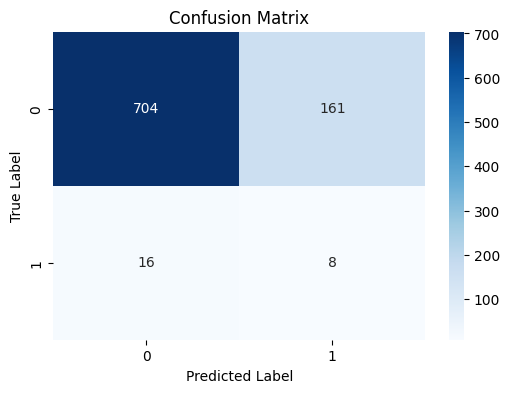

In [89]:
# DIFFERENT MODELS

# Create a label encoder object

# label_encoder_date = LabelEncoder()

# model_instance = LogisticRegression(class_weight='balanced', max_iter=2000)
model_instance = LogisticRegression(class_weight='balanced',penalty='l2', max_iter=2000, C=1000)


# model_instance = SVC(kernel='rbf', class_weight='balanced')

# # Create a CatBoost classifier
class_weights = {0: 1, 1: 200}  # Higher weight for class 1 (minority class)
# model_instance = CatBoostClassifier(iterations=10, learning_rate=0.1, depth=3, loss_function='Logloss', class_weights=class_weights)

# model_instance = CatBoostClassifier(iterations=1000, learning_rate=0.1, depth=5, loss_function='Logloss', l2_leaf_reg=10, class_weights=class_weights, verbose=False)
# model_instance = CatBoostClassifier(iterations=1000, learning_rate=0.1, depth=5, loss_function='Logloss', l2_leaf_reg=10, class_weights=class_weights, early_stopping_rounds=50, verbose=False)


# model_instance = RandomForestClassifier(n_estimators=10000, class_weight= 'balanced', max_depth=5,criterion = 'entropy', n_jobs=-1)


def preprocess_data(df):
    global label_encoder_country  # Ensure we use the same global label encoder
    # global label_encoder_date  
    # df['country_code_encoded'] = label_encoder_country.fit_transform(df['ActionGeo_CountryCode'])
    # df['date_encoded'] = label_encoder_date.fit_transform(df['SQLDATE'])

    df.dropna(inplace=True)
    # df['date_country'] = df['date'].astype(str) + '_' + df['country_code_encoded'].astype(str)
    # df.sort_values(by='date_country', inplace=True)

    return df

def train_model(df, model_instance):
    # Preprocess the data
    df_processed = preprocess_data(df)
    # print(df_processed.head())
    # Prepare the data
    # columns_to_exclude = ['QuadClass','GoldsteinScale','AvgTone','NumArticles','ActionGeo_CountryCode', 'Contains14', 
    #                                             'lag_Contains14 ' + str(n_future), 'SQLDATE','EventCode','date_country']
    columns_to_exclude = ['ActionGeo_CountryCode', 'lag_fut_Contains14 ' + str(n_future),
                                                'EventCode','date_country', 'SQLDATE', 'level_0', 'GoldsteinScale', 'QuadClass']
    X = df_processed.loc[:, ~df_processed.columns.isin(columns_to_exclude)]
    
    
    
#     X = df_processed = df_multi_country_date.loc[:, df_multi_country_date.columns != ['QuadClass','GoldsteinScale','AvgTone','NumArticles','ActionGeo_CountryCode', 'Contains14', 
#                                                 'lag_Contains14 ' + str(n_future)]]
    # X = df_processed[['lag_GoldsteinScale ' + str(n_past), 'lag_QuadClass ' + str(n_past), 'country_code_encoded']]
    # print(X.head())
    y = df_processed['lag_fut_Contains14 ' + str(n_future)]

    # Handle missing values
    # imputer = SimpleImputer()
    # X = imputer.fit_transform(X)

    # Split the data into training and testing sets
    # X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.333333, random_state=42)
    
    # Set the split point as a fraction of the total length
    split_point = int(len(X) * 0.7)  # Adjust the fraction as needed

    # Perform the rolling window split
    X_train = X[:split_point]
    X_test = X[split_point:]
    y_train = y[:split_point]
    y_test = y[split_point:]

    
  

#     # Create the Lasso regularization model
#     lasso_model = LassoCV(cv=10)

#     # Fit the Lasso model to the data to select features
#     lasso_model.fit(X_train, y_train)

#     # Get the selected features based on non-zero coefficients
#     selected_features = X_train.columns[lasso_model.coef_ != 0]






    

#     # OVERSAMPLING
#     smote = SMOTE(random_state=42)

#     # Resample the training data using SMOTE
#     X_train, y_train = smote.fit_resample(X_train, y_train)
#     # print(y_train['lag_Contains14 0'].values_count())
#     print(y_train.value_counts())
    
#     # UNDERSAMPLE
#     # Define the RandomUnderSampler object
#     rus = RandomUnderSampler(sampling_strategy=1, random_state=42)

#     # Perform undersampling on the training data
#     X_train, y_train = rus.fit_resample(X_train, y_train)
#     print(y_train.value_counts())

    
    
    
    
    # Train the model
    model_instance.fit(X_train, y_train)
    # model_instance.fit(X_train[selected_features], y_train)
    # X_train = X_train[selected_features]
    # X_test = X_test[selected_features]
    
#     GLM
#     X_train = sm.add_constant(X_train)  # Add a constant term to the feature matrix
#     poisson_model = sm.GLM(y_train, X_train, family=sm.families.Poisson())
#     poisson_results = poisson_model.fit()

#     # Print the model summary
#     # print(poisson_results.summary())

#     # Predict on the test set
#     X_test = sm.add_constant(X_test)  # Add a constant term to the test feature matrix
#     predicted_counts = poisson_results.predict(X_test)

#     # Evaluate the model (example: calculate mean squared error)
#     mse = np.mean((y_test - predicted_counts) ** 2)
#     print("Mean Squared Error:", mse)
    
    
#     # Assuming you have the observed counts and predicted counts from the previous code example

#     observed_counts = y_test
#     predicted_counts = poisson_results.predict(X_test)

#     # Round the predicted counts to the nearest integer
#     predicted_counts = np.round(predicted_counts)

#     # Add a small constant value to the predicted counts to avoid zero expected frequencies
#     epsilon = 1e-10
#     predicted_counts_adjusted = predicted_counts + epsilon

#     # Create a contingency table from the observed and adjusted predicted counts
#     contingency_table = np.column_stack((observed_counts, predicted_counts_adjusted))

#     # Perform the Chi-squared test
#     _, p_value, _, expected_counts = chi2_contingency(contingency_table)

#     # Print the results
#     print("Chi-squared test results:")
#     print("Observed Counts:", observed_counts)
#     print("Predicted Counts:", predicted_counts_adjusted)
#     print("Expected Counts:", expected_counts)
#     print("p-value:", p_value)



    return model_instance, X_train, X_test, y_train, y_test

def predict_risk(input_data, model):
    # Preprocess input data
    input_data = pd.DataFrame(input_data, columns=['lag_GoldsteinScale ' + str(n_past), 'lag_QuadClass ' + str(n_past), 
                                                   'country_code_encoded'])
    # input_data = imputer.transform(input_data)

    # Make prediction
    risk_prediction = model.predict(input_data)

    return risk_prediction


def calculate_metrics(y_train, y_train_pred, y_test, y_test_pred):
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    train_precision = precision_score(y_train, y_train_pred, average='macro')
    test_precision = precision_score(y_test, y_test_pred, average='macro')

    train_recall = recall_score(y_train, y_train_pred, average='macro')
    test_recall = recall_score(y_test, y_test_pred, average='macro')

    train_f1 = f1_score(y_train, y_train_pred, average='macro')
    test_f1 = f1_score(y_test, y_test_pred, average='macro')
    
    metrics_df = pd.DataFrame({
        'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-score'],
        'Train': [train_accuracy, train_precision, train_recall, train_f1],
        'Test': [test_accuracy, test_precision, test_recall, test_f1]})

    return metrics_df

def preprocess_input(input_data):
    global label_encoder_country  # Ensure we use the same global label encoder
    # global label_encoder_date  
    
    input_data['country_code_encoded'] = label_encoder_country.transform(input_data['ActionGeo_CountryCode'])
    # input_data['date_encoded'] = label_encoder.transform(input_data['SQLDATE'])
    input_data = pd.DataFrame(input_data, columns=['lag_GoldsteinScale ' + str(n_past), 'lag_QuadClass ' + str(n_past), 
                                                   'country_code_encoded'])
    # input_data.drop('country_code', axis=1, inplace=True)
    return input_data

# Example usage
df_train = df_multi_country_date.copy()
# df_train = downsampled_df.copy()






# Train the model
model, X_train, X_test, y_train, y_test = train_model(df_train, model_instance)

# print(X_train.head())
# print(X_test.head())

# print(y_test.isna().sum())

# Example usage
# Example usage
# country_code = 'FR'
# # sqldate 
# input_data = {
#     'lag_GoldsteinScale ' + str(n_past): [10],
#     'lag_QuadClass ' + str(n_past): [1],
#     'ActionGeo_CountryCode': [country_code]
#     # 'SQLDATE': [sqldate]
    
# }

# # Preprocess the input data
# input_data_transformed = preprocess_input(input_data)
# # print(input_data_transformed.head())

# prediction = predict_risk(input_data_transformed, model)
# print(f"Risk prediction for country {country_code}: {prediction}")

# Calculate and print model metrics
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)



metrics_df = calculate_metrics(y_train, y_train_pred, y_test, y_test_pred)


print(metrics_df)

# print(f"Train Accuracy: {train_accuracy:.4f}")
# print(f"Test Accuracy: {test_accuracy:.4f}")

# print(f"Train Precision: {train_precision:.4f}")
# print(f"Test Precision: {test_precision:.4f}")

# print(f"Train Recall: {train_recall:.4f}")
# print(f"Test Recall: {test_recall:.4f}")

# print(f"Train F1-score: {train_f1:.4f}")
# print(f"Test F1-score: {test_f1:.4f}")


 # Plot the confusion matrix
cm = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

Feature extraction for catboost

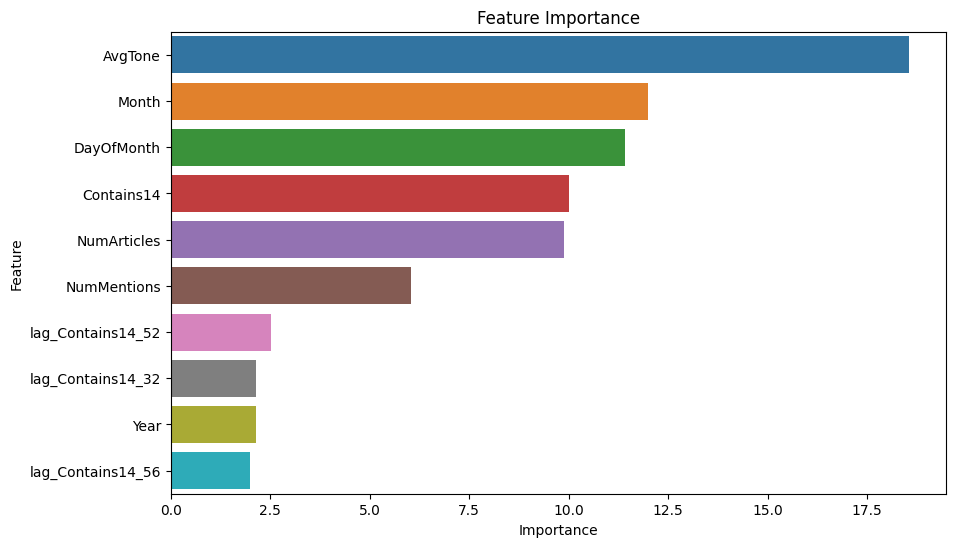

In [322]:
# Get feature importance
feature_importance = model.get_feature_importance()

# Get feature names
feature_names = X_train.columns

# Create a dataframe for feature importance
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})

# Sort the dataframe by importance values
feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)

# Plot the feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10))
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


Feature extraction for random forest

In [73]:

# Get feature names
feature_names = X_train.columns
# random forest feature importance
# Create a DataFrame to store feature importance
feature_importance = pd.DataFrame({'Feature': feature_names, 'Importance': model.feature_importances_})

# Sort the DataFrame by importance
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# Print the feature importance
print(feature_importance)

                  Feature  Importance
2             NumMentions    0.129150
4              Contains14    0.106838
1             NumArticles    0.090927
0                 AvgTone    0.079974
110            DayOfMonth    0.060604
..                    ...         ...
66      lag_Contains14_59    0.001631
21      lag_Contains14_14    0.001527
13       lag_Contains14_6    0.001462
3           Contains14sub    0.000000
5    country_code_encoded    0.000000

[111 rows x 2 columns]


# Saving files

In [252]:
import os

# Specify the file name
file_name = 'randomforest_lookback_10_forward_1.csv'

# Specify the file path in the current working directory
file_path = os.path.join('/home/jupyter/gdelt/reports/results', file_name)

# Save the DataFrame as a CSV file
metrics_df.to_csv(file_path, index=False)


In [253]:
# Save the trained model
file_name = 'random_forest_lookback_10_forward_1.joblib'

# Specify the file path in the current working directory
file_path = os.path.join('/home/jupyter/gdelt/models', file_name)
joblib.dump(model, file_path)


['/home/jupyter/gdelt/models/random_forest_lookback_10_forward_1.joblib']

In [ ]:
# # Load the saved model
# loaded_model = joblib.load(file_path)
# y_train_pred = loaded_model.predict(X_train)

In [ ]:
datatata = preprocess_data(df)
datatata.isna().sum()